##### Import essential packages:

In [18]:
import numpy as np
import pandas as pd
import pickle
import squidpy as sq
import seaborn as sns
import shout
from IPython.display import set_matplotlib_formats
import random
import scanpy as sc
import time
import pickle
import matplotlib.pyplot as plt

/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


##### Global variable definitions:

In [4]:
adata_path='/Volumes/time-mach-14pro/adataTCL_celltype_annotated.pkl'
cluster_key='celltype'

In [5]:
with open(adata_path, 'rb') as f:
    Pkl=pickle.load(f)

In [6]:
patients_good=[]
patients_bad=[]
for i in Pkl:
    adata=Pkl[i]
    try:
        start = time.time()
        shout.all_scores(adata, cluster_key=cluster_key, radius=2)
        end = time.time()
        adata.uns['SHouT_execution_time']=end-start
        print('Patient#: '+str(i))
        patients_good.append(i)
    except:
        print('Patient# '+str(i)+': Not enough cells in image to generate spatial neighbors graph')
        patients_bad.append(i)
    

Patient#: 60
Patient#: 61
Patient#: 62
Patient#: 63
Patient#: 64
Patient#: 67
Patient#: 68
Patient#: 69
Patient#: 70
Patient#: 71
Patient#: 72
Patient#: 73
Patient#: 74
Patient#: 75
Patient#: 76
Patient#: 78
Patient#: 79
Patient#: 80
Patient#: 81
Patient#: 82
Patient#: 83
Patient#: 84
Patient#: 85
Patient#: 86
Patient#: 87
Patient#: 264
Patient#: 265
Patient#: 266
Patient#: 267
Patient#: 268
Patient#: 269
Patient#: 270
Patient#: 271
Patient#: 272
Patient#: 273
Patient#: 274
Patient#: 275
Patient#: 276
Patient#: 277
Patient#: 278
Patient#: 279
Patient#: 280
Patient#: 281
Patient#: 282
Patient#: 284
Patient#: 285
Patient#: 286
Patient#: 287
Patient# 291: Not enough annotated (clustered) cells in image to generate spatial neighbors graph
Patient#: 293
Patient# 294: Not enough annotated (clustered) cells in image to generate spatial neighbors graph
Patient#: 295
Patient#: 296
Patient#: 297
Patient#: 298
Patient#: 299
Patient#: 300
Patient#: 302
Patient#: 303
Patient#: 304
Patient#: 305
Pat

In [7]:
Pkl

{60: AnnData object with n_obs × n_vars = 1219 × 35
     obs: 'cell_id', 'celltype', 'local_entropy_2', 'local_homophily_2', 'egophily_2'
     uns: 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_id', 'field_of_view', 'spatial', 'control_mean_expression', 'control_std_expression', 'cell_coordinates', 'global_entropy', 'global_homophily', 'SHouT_execution_time'
     obsm: 'segment_size', 'field_of_view', 'control_mean_expression', 'control_std_expression', 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_label', 'spatial',
 61: AnnData object with n_obs × n_vars = 3370 × 35
     obs: 'cell_id', 'celltype', 'local_entropy_2', 'local_homophily_2', 'egophily_2'
     uns: 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_id', 'field_of_view', 'spatial', 'control_mean_expression', 'control_std_expression', 'cell_coordinates', 'global_entropy', 'global_homophily', 'SHouT_execution_time'
     obsm: 'segment_size', 'field_of_view', 'control_mean_expression', 'control_std_expression', 'Group', '

In [8]:
adata

AnnData object with n_obs × n_vars = 435 × 35
    obs: 'cell_id', 'celltype', 'local_entropy_2', 'local_homophily_2', 'egophily_2'
    uns: 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_id', 'field_of_view', 'spatial', 'control_mean_expression', 'control_std_expression', 'cell_coordinates', 'global_entropy', 'global_homophily', 'SHouT_execution_time'
    obsm: 'segment_size', 'field_of_view', 'control_mean_expression', 'control_std_expression', 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_label', 'spatial'

In [9]:
adata.obs['celltype']

0      Endothelial cells
1      Endothelial cells
2      Endothelial cells
3      Endothelial cells
4      Endothelial cells
             ...        
430              Unknown
431              Unknown
432              Unknown
433              Unknown
434              Unknown
Name: celltype, Length: 435, dtype: object

In [10]:
adata.obs['celltype']

0      Endothelial cells
1      Endothelial cells
2      Endothelial cells
3      Endothelial cells
4      Endothelial cells
             ...        
430              Unknown
431              Unknown
432              Unknown
433              Unknown
434              Unknown
Name: celltype, Length: 435, dtype: object

In [11]:
LOCAL_ENTROPY_2={}
LOCAL_HOMOPHILY_2={}
EGOPHILY_2={}

DF=[]
for i in Pkl:
    if i not in patients_bad:
        df=pd.DataFrame()
        celltype=Pkl[i].obs['celltype']
        df['celltype']=celltype
        local_entropy_2=Pkl[i].obs['local_entropy_2']
        df['local_entropy_2']=local_entropy_2
        local_homophily_2=Pkl[i].obs['local_homophily_2']
        df['local_homophily_2']=local_homophily_2
        egophily_2=Pkl[i].obs['egophily_2']
        df['egophily_2']=egophily_2
        # ---
        df['cell_id']=Pkl[i].obs['cell_id']
        df['celltype']=Pkl[i].obs['celltype']
        df['cell_index_in_patient']=Pkl[i].to_df().index
        # ---
        df['Group']=Pkl[i].uns['Group']
        df['SHouT_execution_time']=Pkl[i].uns['SHouT_execution_time']
        df['patient_id']=Pkl[i].uns['patient_id']
        df['patient_index']=i
        # ---
        DF.append(df)
        # ---
    else:
        print('Patient# '+str(i)+' did not have enough annotated (clustered) cells to generate spatial neighborhood graph!')
DF=pd.concat(DF, axis=0)
conditions=np.unique(DF.Group)

Patient# 291 did not have enough annotated (clustered) cells to generate spatial neighborhood graph!
Patient# 294 did not have enough annotated (clustered) cells to generate spatial neighborhood graph!


In [12]:
DF

,celltype,local_entropy_2,local_homophily_2,egophily_2,cell_id,cell_index_in_patient,Group,SHouT_execution_time,patient_id,patient_index
0,Endothelial cells,0.261773,0.110048,0.800000,1,0,Eczema,2.273372,Eczema_01,60
1,Endothelial cells,0.626787,0.020239,0.551724,2,1,Eczema,2.273372,Eczema_01,60
2,Endothelial cells,0.245007,0.078829,0.850000,3,2,Eczema,2.273372,Eczema_01,60
3,Endothelial cells,0.512574,0.044974,0.631579,4,3,Eczema,2.273372,Eczema_01,60
4,Endothelial cells,0.453632,0.062500,0.647059,5,4,Eczema,2.273372,Eczema_01,60
...,...,...,...,...,...,...,...,...,...,...
430,Unknown,0.820498,0.008902,0.291667,431,430,T-Cell Lymphoma,0.930618,TCL_11,315
431,Unknown,0.794405,0.007642,0.222222,432,431,T-Cell Lymphoma,0.930618,TCL_11,315
432,Unknown,0.757444,0.011218,0.260870,433,432,T-Cell Lymphoma,0.930618,TCL_11,315
433,Unknown,0.807836,0.005917,0.111111,434,433,T-Cell Lymphoma,0.930618,TCL_11,315


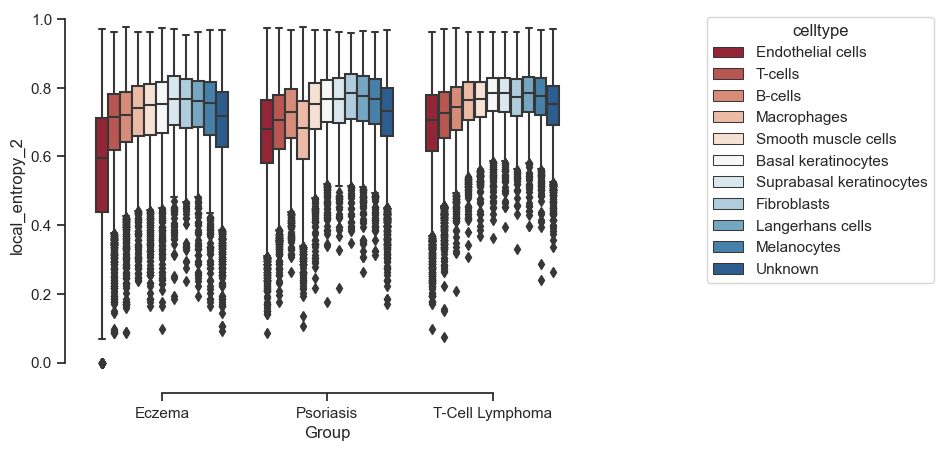

In [13]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# ---
f=sns.boxplot(x="Group", y="local_entropy_2",
            hue="celltype", palette='RdBu',
            data=DF)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

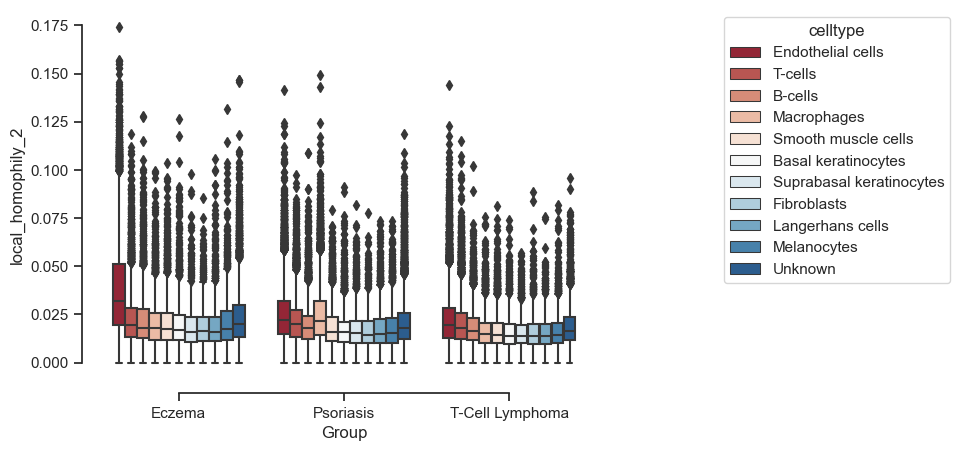

In [14]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# ---
f=sns.boxplot(x="Group", y="local_homophily_2",
            hue="celltype", palette='RdBu',
            data=DF)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

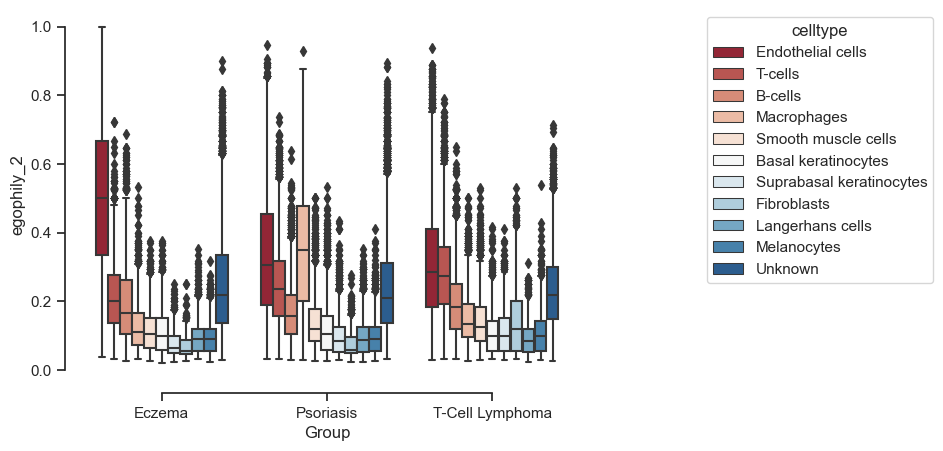

In [15]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# ---
f=sns.boxplot(x="Group", y="egophily_2",
            hue="celltype", palette='RdBu',
            data=DF)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

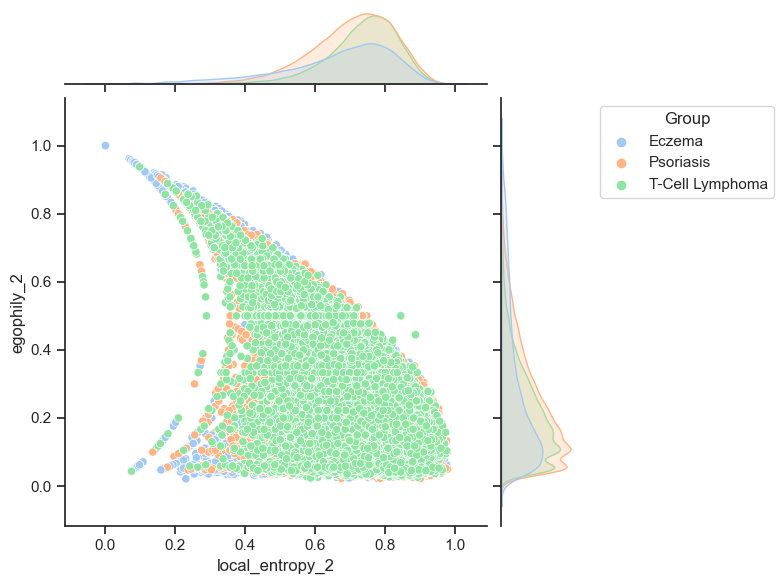

In [16]:
f = sns.jointplot(data=DF, x='local_entropy_2', y='egophily_2', hue='Group')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

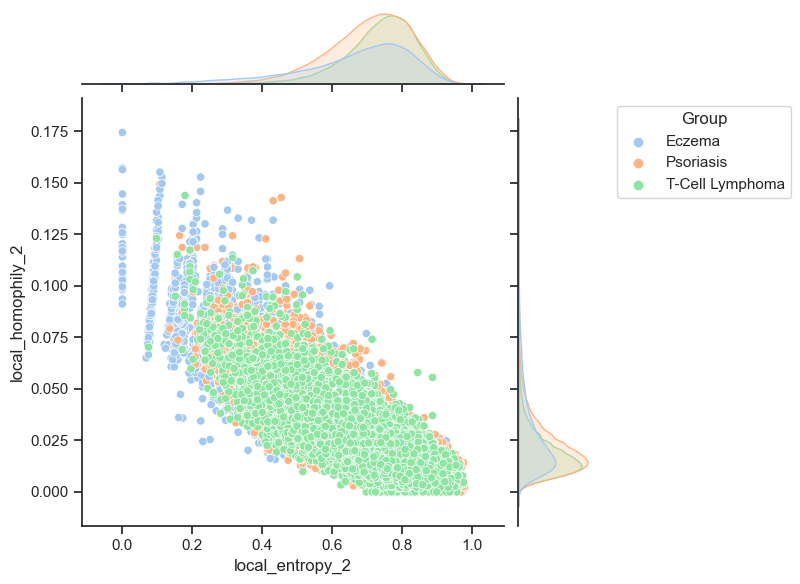

In [17]:
f = sns.jointplot(data=DF, x='local_entropy_2', y='local_homophily_2', hue='Group')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

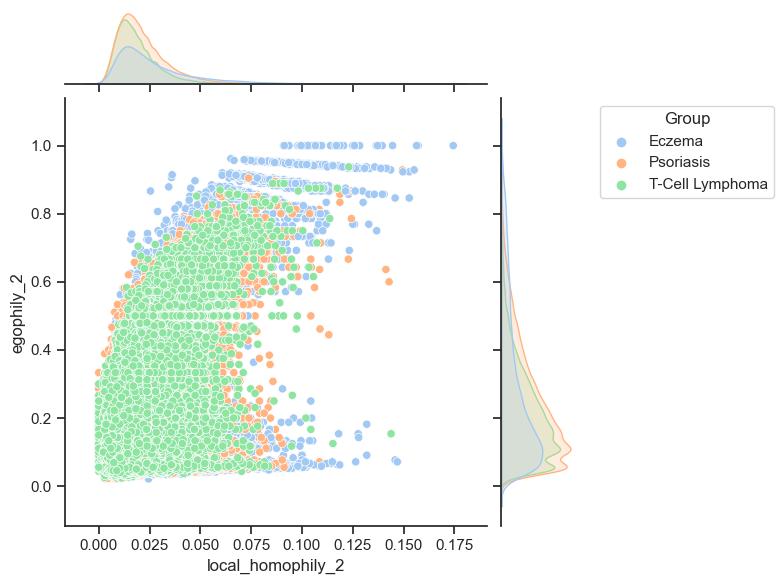

In [18]:
f = sns.jointplot(data=DF, x='local_homophily_2', y='egophily_2', hue='Group')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

# Scalability across varying no. of cells in tissue:

<Axes: xlabel='no. of cells in tissue', ylabel='SHouT_execution_time'>

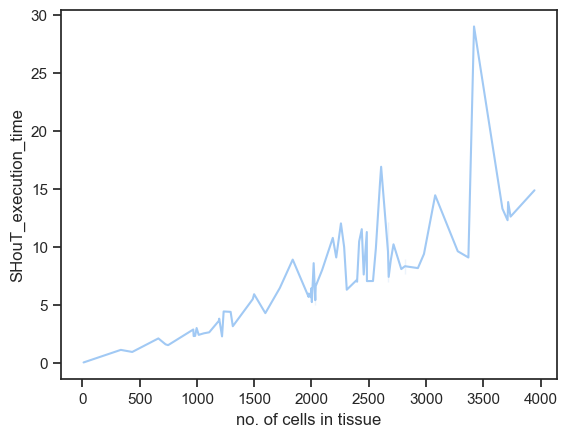

In [19]:
DF_TIME=[]
for i in patients_good:
    DF_time=DF[DF['patient_index']==i]
    df=pd.DataFrame()
    df['no. of cells in tissue']=[len(DF_time)]
    df['SHouT_execution_time']=DF_time['SHouT_execution_time'][0]
    df['patient_index']=DF_time['patient_index'][0]
    df['patient_id']=DF_time['patient_id'][0]
    DF_TIME.append(df)
DF_TIME=pd.concat(DF_TIME, axis=0)
# -----
sns.lineplot(data=DF_TIME, x="no. of cells in tissue", y="SHouT_execution_time", markers=True, dashes=False)

- This is not really interesting. This kind of behavior is expected because we are calculating the local heterogeneity measures for each and every cell, therefore it is expected that with increasing number of cells, the algorithm increases in time complexity.

# Robustness across varying no. of cells in tissue:

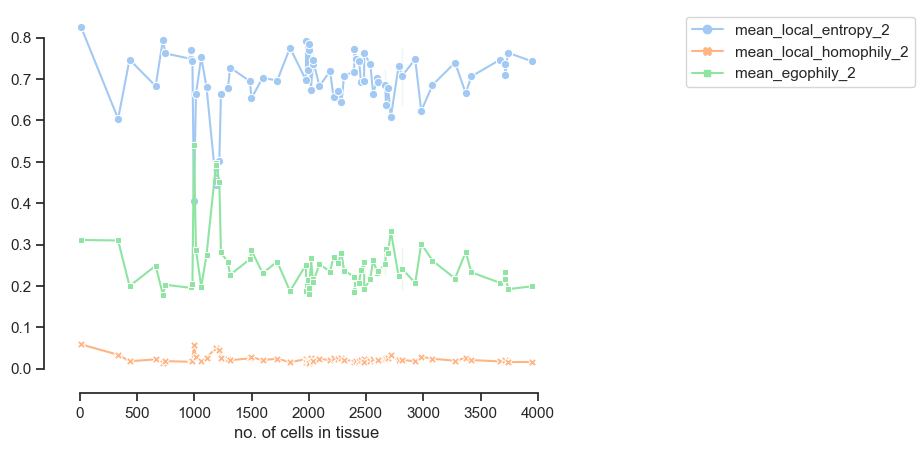

In [20]:
DF_ROBUSTNESS=[]
for i in patients_good:
    DF_rob=DF[DF['patient_index']==i]
    df=pd.DataFrame()
    df['no. of cells in tissue']=[len(DF_rob)]
    df['mean_local_entropy_2']=np.mean(DF_rob['local_entropy_2'])
    df['mean_local_homophily_2']=np.mean(DF_rob['local_homophily_2'])
    df['mean_egophily_2']=np.mean(DF_rob['egophily_2'])
    df=df.set_index('no. of cells in tissue', drop=True)
    DF_ROBUSTNESS.append(df)
DF_ROBUSTNESS=pd.concat(DF_ROBUSTNESS, axis=0)
# -----
# melted=pd.melt(DF_ROBUSTNESS)
# -----
f=sns.lineplot(data=DF_ROBUSTNESS, markers=True, dashes=False)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

- This result is exactly as expected. We don't expect heterogeneity values to change greatly based solely on number of cells present in tissue; rather their homogeneous/ heterogeneity nature. For example, how closely they form clusters with their own kind. Or, how diverse their neighbors are, et cetera.

In [21]:
with open('MELC_TCL_caseStudy_notebook_data.pkl', 'wb') as f:
    pickle.dump([Pkl, DF, conditions, DF_TIME, DF_ROBUSTNESS], f)

# Differential Analyses:

## I. Data preparation:

In [23]:
DF

,celltype,local_entropy_2,local_homophily_2,egophily_2,cell_id,cell_index_in_patient,Group,SHouT_execution_time,patient_id,patient_index
0,Endothelial cells,0.261773,0.110048,0.800000,1,0,Eczema,2.273372,Eczema_01,60
1,Endothelial cells,0.626787,0.020239,0.551724,2,1,Eczema,2.273372,Eczema_01,60
2,Endothelial cells,0.245007,0.078829,0.850000,3,2,Eczema,2.273372,Eczema_01,60
3,Endothelial cells,0.512574,0.044974,0.631579,4,3,Eczema,2.273372,Eczema_01,60
4,Endothelial cells,0.453632,0.062500,0.647059,5,4,Eczema,2.273372,Eczema_01,60
...,...,...,...,...,...,...,...,...,...,...
430,Unknown,0.820498,0.008902,0.291667,431,430,T-Cell Lymphoma,0.930618,TCL_11,315
431,Unknown,0.794405,0.007642,0.222222,432,431,T-Cell Lymphoma,0.930618,TCL_11,315
432,Unknown,0.757444,0.011218,0.260870,433,432,T-Cell Lymphoma,0.930618,TCL_11,315
433,Unknown,0.807836,0.005917,0.111111,434,433,T-Cell Lymphoma,0.930618,TCL_11,315


In [76]:
DF_reset=DF.copy()
DF_reset=DF_reset.reset_index(drop=True)
celltypes_=np.unique(DF_reset.celltype)
conditions_=np.unique(DF_reset.Group)
# print(DF_reset)

In [77]:
DF_celltypes_dict={}
DF_celltypeIndices_dict={}
for i in celltypes_:
    df_=DF_reset[DF_reset['celltype']==i]
    DF_celltypes_dict[i]=df_
    DF_celltypeIndices_dict[i]=list(df_.index)

In [78]:
DF_conditions_dict={}
DF_conditionIndices_dict={}
for i in conditions_:
    df_=DF_reset[DF_reset['Group']==i]
    DF_conditions_dict[i]=df_
    DF_conditionIndices_dict[i]=list(df_.index)

In [88]:
condition_celltype_indices_dict={}
condition_celltype_DF_dict={}
condition_celltype_dict_dict={}
for i in conditions_:
    condition_celltype_indices_dict[i]={}
    condition_celltype_DF_dict[i]={}
    condition_celltype_dict_dict[i]={}
    for j in celltypes_:
        indices_=list(set(DF_conditionIndices_dict[i]).intersection(set(DF_celltypeIndices_dict[j])))
        condition_celltype_indices_dict[i][j]=indices_
        condition_celltype_DF_dict[i][j]=DF_reset.loc[indices_]
        condition_celltype_dict_dict[i][j]=DF_reset.loc[indices_].copy().to_dict()

In [89]:
DF_reset.loc[indices_]

,celltype,local_entropy_2,local_homophily_2,egophily_2,cell_id,cell_index_in_patient,Group,SHouT_execution_time,patient_id,patient_index
131072,Unknown,0.801982,0.017804,0.166667,2163,2162,T-Cell Lymphoma,12.018803,TCL_09,308
131073,Unknown,0.701129,0.022358,0.333333,2164,2163,T-Cell Lymphoma,12.018803,TCL_09,308
131074,Unknown,0.694640,0.015842,0.095238,2165,2164,T-Cell Lymphoma,12.018803,TCL_09,308
131075,Unknown,0.717770,0.011139,0.307692,2166,2165,T-Cell Lymphoma,12.018803,TCL_09,308
131076,Unknown,0.718111,0.020566,0.210526,2167,2166,T-Cell Lymphoma,12.018803,TCL_09,308
...,...,...,...,...,...,...,...,...,...,...
131067,Unknown,0.664606,0.009615,0.173913,2158,2157,T-Cell Lymphoma,12.018803,TCL_09,308
131068,Unknown,0.810452,0.015873,0.250000,2159,2158,T-Cell Lymphoma,12.018803,TCL_09,308
131069,Unknown,0.752209,0.019763,0.125000,2160,2159,T-Cell Lymphoma,12.018803,TCL_09,308
131070,Unknown,0.839358,0.011416,0.250000,2161,2160,T-Cell Lymphoma,12.018803,TCL_09,308


# Save data(2):

In [13]:
import matlab
import matlab.engine
myEngine = matlab.engine.start_matlab()

In [14]:
import itertools
mwu_pvals_per_celltype={}
local_heterogeneity_measures=['local_entropy_2', 'local_homophily_2', 'egophily_2']
condition_combinations=list(itertools.combinations(conditions_, 2))
mwu_pvals_per_celltype_insignificant_index=[]
# ---
for j in celltypes_:
    mwu_pvals_per_celltype[j]={}
    for i1, i2 in condition_combinations:
        mwu_pvals_per_celltype[j][(i1, i2)]={}
        for k in local_heterogeneity_measures:
            l1=list(condition_celltype_dict_dict[i1][j][k].values())
            matList1=matlab.double(l1)
            l2=list(condition_celltype_dict_dict[i2][j][k].values())
            matList2=matlab.double(l2)
            p=myEngine.ranksum(matList1,matList2)
            mwu_pvals_per_celltype[j][(i1, i2)][k]=p
            # ---
            if p>=0.05:
                mwu_pvals_per_celltype_insignificant_index.append([j, (i1, i2), k]) 

In [15]:
mwu_pvals_per_celltype_insignificant_index
mwu_pvals_per_celltype_significant=mwu_pvals_per_celltype.copy()
for i1, i2, i3 in mwu_pvals_per_celltype_insignificant_index:
    del mwu_pvals_per_celltype_significant[i1][i2][i3]

In [16]:
with open('MELC_TCL_caseStudy_notebook_data2.pkl', 'wb') as f:
    pickle.dump([DF_reset, celltypes_, conditions_, DF_celltypes_dict, DF_celltypeIndices_dict, DF_conditions_dict, DF_conditionIndices_dict, condition_celltype_indices_dict, condition_celltype_DF_dict, condition_celltype_dict_dict, mwu_pvals_per_celltype, local_heterogeneity_measures, condition_combinations, mwu_pvals_per_celltype_insignificant_index, mwu_pvals_per_celltype_significant], f)

In [35]:
with open('MELC_TCL_caseStudy_notebook_data2.pkl', 'rb') as f:
    DF_reset, celltypes_, conditions_, DF_celltypes_dict, DF_celltypeIndices_dict, DF_conditions_dict, DF_conditionIndices_dict, condition_celltype_indices_dict, condition_celltype_DF_dict, condition_celltype_dict_dict, mwu_pvals_per_celltype, local_heterogeneity_measures, condition_combinations, mwu_pvals_per_celltype_insignificant_index, mwu_pvals_per_celltype_significant=pickle.load(f)

# ========================

In [36]:
# ---
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
import seaborn as sns
# sns.set_theme()
sns.set_theme(style="whitegrid")
# plt.rcdefaults()
import matplotlib.pyplot as plt

In [37]:
mwu_pvals_per_celltype_significant

{'B-cells': {('Eczema',
   'Psoriasis'): {'local_entropy_2': 2.0799297800974776e-05, 'local_homophily_2': 1.199734356005959e-09, 'egophily_2': 5.171686725568723e-10},
  ('Eczema', 'T-Cell Lymphoma'): {'local_entropy_2': 2.623508722190963e-26,
   'local_homophily_2': 1.5365601067770372e-25,
   'egophily_2': 7.691307594468427e-08},
  ('Psoriasis', 'T-Cell Lymphoma'): {'local_entropy_2': 3.889188607975583e-13,
   'local_homophily_2': 2.0186862049505867e-07,
   'egophily_2': 9.839101107723968e-51}},
 'Basal keratinocytes': {('Eczema',
   'Psoriasis'): {'local_entropy_2': 1.3175147718539414e-09, 'local_homophily_2': 3.1106867779053064e-10, 'egophily_2': 0.0020671053837426176},
  ('Eczema', 'T-Cell Lymphoma'): {'local_entropy_2': 1.6112798220653272e-31,
   'local_homophily_2': 2.9082704448572377e-30},
  ('Psoriasis', 'T-Cell Lymphoma'): {'local_entropy_2': 2.5362049831401964e-12,
   'local_homophily_2': 6.609564451953686e-11,
   'egophily_2': 3.738160699926959e-06}},
 'Endothelial cells': {(

## II. Important functions

In [84]:
def plot_local_heterogeneity_based_differential_analyses_conditionPairWise(condition1, condition2, heterogeneity_score_under_review):
    conditions_under_review=[condition1, condition2]
    cond1, cond2=sorted(conditions_under_review)
    # =====================
    count = 0
    _list_=[]
    _p_=[]
    not_present_list=[]
    for j in mwu_pvals_per_celltype_significant:
        if ((cond1, cond2) in mwu_pvals_per_celltype_significant[j]) and (heterogeneity_score_under_review in mwu_pvals_per_celltype_significant[j][(cond1, cond2)]):
            count+=1
            _list_.append(j)
            _p_.append(mwu_pvals_per_celltype_significant[j][(cond1, cond2)][heterogeneity_score_under_review])
        else:
            not_present_list.append(j)
    # ---
    _dict_=dict(zip(_list_, _p_))
    _dict_=dict(sorted(_dict_.items(), key=lambda item: item[1]))
    _list_=_dict_.keys()
    _len_=len(_list_)
    no_of_rows=int(count/2)-1
    if no_of_rows==0:
        no_of_rows=1
    # =====================
    if len(not_present_list)>0:
        str_='['
        for i in not_present_list:
            str_=str_+str(i)+', '
        str_ = str_[:-2 or None]
        str_+='] cells do not show significant ' + f'{heterogeneity_score_under_review} scores between conditions {cond1} and {cond2}.'
    # =====================
    fig = plt.figure(layout="constrained", figsize=(15, 15))
    _title_=f'{heterogeneity_score_under_review} scores of significantly differentiated cell types (p<0.05)\n'+f'({cond1} vs {cond2})\n'
    fig.suptitle(_title_, fontsize=12)
    ax_array = fig.subplots(no_of_rows,3, squeeze=False)
    ax_arrays=[]
    # ---
    count=-1
    count_outer=-1
    count_inner=-1
    for i in _list_:
        DF=[]
        _DF1_=pd.DataFrame()
        _DF1_[heterogeneity_score_under_review]=condition_celltype_dict_dict[cond1][i][heterogeneity_score_under_review].values()
        _DF1_['celltype']=i
        _DF1_['condition']=cond1
        DF.append(_DF1_)
        _DF2_=pd.DataFrame()
        _DF2_[heterogeneity_score_under_review]=condition_celltype_dict_dict[cond2][i][heterogeneity_score_under_review].values()
        _DF2_['celltype']=i
        _DF2_['condition']=cond2
        DF.append(_DF2_)
        DF=pd.concat(DF, axis=0)
        # ---
        if((float(count+1)%float(3))==0):
            count_outer+=1
            count_inner=-1
        # ---
        count+=1
        count_inner+=1
        print(count, count_outer, count_inner)
        # ---
        xlabel='\nCondition'
        _str_=f'n({i})'
        ylabel='Neighborhood enrichment score\n'
        # ---
        sns.boxplot(x="celltype", y=heterogeneity_score_under_review, hue="condition", data=DF, ax=ax_array[count_outer, count_inner])
        # ---
        _x_=round(mwu_pvals_per_celltype_significant[i][(cond1, cond2)][heterogeneity_score_under_review],5)
        title=f'{i}('+'${{p}_{MWU}=}$'+f'{_x_}'+')'
        ax_array[count_outer, count_inner].set_title(title)
        # ---
        ax_array[count_outer, count_inner].set_xlabel('')
        # axes.set_ylabel(ylabel,fontsize=50)
        ax_array[count_outer, count_inner].set_ylabel('')
        # ---
        handles, labels = ax_array[count_outer, count_inner].get_legend_handles_labels()
        ax_array[count_outer, count_inner].legend(handles=handles[::-1], labels=[cond1, cond2])
        # ---
        ax_arrays.append(ax_array[count_outer, count_inner])
        # ==================================
    fig.tight_layout()
    plt.savefig(f'boxplot_significant_{heterogeneity_score_under_review}_scores_{cond1}vs{cond2}.jpg', format='jpg', bbox_inches='tight')
    plt.show()
    plt.close()
    # ---

In [64]:
condition_celltype_DF_dict

DF_local_heterogeneity_scores=[]
for i in condition_celltype_DF_dict:
    df_=[]
    for j in condition_celltype_DF_dict[i]:
        df_.append(condition_celltype_DF_dict[i][j])
    df_=pd.concat(df_, axis=0)
    df_['condition']=i
    DF_local_heterogeneity_scores.append(df_)
DF_local_heterogeneity_scores=pd.concat(DF_local_heterogeneity_scores, axis=0)

DF_local_heterogeneity_scores

,celltype,local_entropy_2,local_homophily_2,egophily_2,cell_id,cell_index_in_patient,Group,SHouT_execution_time,patient_id,patient_index,condition
40960,B-cells,0.811950,0.007905,0.200000,1350,1349,Eczema,8.001685,Eczema_13,85,Eczema
40961,B-cells,0.705627,0.020468,0.222222,1351,1350,Eczema,8.001685,Eczema_13,85,Eczema
40962,B-cells,0.546599,0.025845,0.142857,1352,1351,Eczema,8.001685,Eczema_13,85,Eczema
40963,B-cells,0.765144,0.014311,0.272727,1353,1352,Eczema,8.001685,Eczema_13,85,Eczema
40964,B-cells,0.488370,0.047170,0.133333,1354,1353,Eczema,8.001685,Eczema_13,85,Eczema
...,...,...,...,...,...,...,...,...,...,...,...
131067,Unknown,0.664606,0.009615,0.173913,2158,2157,T-Cell Lymphoma,12.018803,TCL_09,308,T-Cell Lymphoma
131068,Unknown,0.810452,0.015873,0.250000,2159,2158,T-Cell Lymphoma,12.018803,TCL_09,308,T-Cell Lymphoma
131069,Unknown,0.752209,0.019763,0.125000,2160,2159,T-Cell Lymphoma,12.018803,TCL_09,308,T-Cell Lymphoma
131070,Unknown,0.839358,0.011416,0.250000,2161,2160,T-Cell Lymphoma,12.018803,TCL_09,308,T-Cell Lymphoma


In [96]:
print(condition_combinations)
# ---
mwu_pvals_per_celltype

[('Eczema', 'Psoriasis'), ('Eczema', 'T-Cell Lymphoma'), ('Psoriasis', 'T-Cell Lymphoma')]


{'B-cells': {('Eczema',
   'Psoriasis'): {'local_entropy_2': 2.0799297800974776e-05, 'local_homophily_2': 1.199734356005959e-09, 'egophily_2': 5.171686725568723e-10},
  ('Eczema', 'T-Cell Lymphoma'): {'local_entropy_2': 2.623508722190963e-26,
   'local_homophily_2': 1.5365601067770372e-25,
   'egophily_2': 7.691307594468427e-08},
  ('Psoriasis', 'T-Cell Lymphoma'): {'local_entropy_2': 3.889188607975583e-13,
   'local_homophily_2': 2.0186862049505867e-07,
   'egophily_2': 9.839101107723968e-51}},
 'Basal keratinocytes': {('Eczema',
   'Psoriasis'): {'local_entropy_2': 1.3175147718539414e-09, 'local_homophily_2': 3.1106867779053064e-10, 'egophily_2': 0.0020671053837426176},
  ('Eczema', 'T-Cell Lymphoma'): {'local_entropy_2': 1.6112798220653272e-31,
   'local_homophily_2': 2.9082704448572377e-30},
  ('Psoriasis', 'T-Cell Lymphoma'): {'local_entropy_2': 2.5362049831401964e-12,
   'local_homophily_2': 6.609564451953686e-11,
   'egophily_2': 3.738160699926959e-06}},
 'Endothelial cells': {(

In [101]:
def plot_local_heterogeneity_based_differential_analyses_cumulative(heterogeneity_score_under_review):
    df=DF_local_heterogeneity_scores.copy()
    # ---
    celltypes=list(np.unique(df.celltype))
    no_of_celltypes=len(celltypes)
    no_of_rows=int(no_of_celltypes/2)-1
    if no_of_rows==0:
        no_of_rows=1
    # ---
    
        
    # ---
    fig = plt.figure(layout="constrained", figsize=(15, 15))
    # # _title_=f'{heterogeneity_score_under_review} scores of significantly differentiated cell types (p<0.05)\n'+f'({cond1} vs {cond2})\n'
    # # fig.suptitle(_title_, fontsize=12)
    ax_array = fig.subplots(no_of_rows,3, squeeze=False)
    ax_arrays=[]
    # ---
    count=-1
    count_outer=-1
    count_inner=-1
    for i in celltypes:
        df_=df[df['celltype']==i]
        # ==================================
        pvals_=[]
        for j in condition_combinations:
            pvals_.append(str(mwu_pvals_per_celltype[i][j][heterogeneity_score_under_review]))
        condComb_pval_dict=dict(zip(condition_combinations, pvals_))
        # ==================================
        pairs=condition_combinations
        # ==================================
        # ---
        if((float(count+1)%float(3))==0):
            count_outer+=1
            count_inner=-1
        # ---
        count+=1
        count_inner+=1
        print(count, count_outer, count_inner)
        # ---
        xlabel='\nCondition'
        _str_=f'n({i})'
        ylabel='Neighborhood enrichment score\n'
        # ---
        ax=sns.boxplot(x="celltype", y=heterogeneity_score_under_review, hue="condition", data=df_, ax=ax_array[count_outer, count_inner])
        # ---
        from statannotations.Annotator import Annotator
        annot = Annotator(ax, pairs, data=df_, x="condition", y=heterogeneity_score_under_review)
        annot.new_plot(ax, pairs=pairs, data=df_, x="condition", y=heterogeneity_score_under_review)
        annot.configure(loc='outside', comparisons_correction=None,)
        annot.set_custom_annotations(pvals_)
        annot.annotate()
        # ---
        # # _x_=round(mwu_pvals_per_celltype_significant[i][(cond1, cond2)][heterogeneity_score_under_review],5)
        # # title=f'{i}('+'${{p}_{MWU}=}$'+f'{_x_}'+')'
        # # ax_array[count_outer, count_inner].set_title(title)
        # ---
        ax_array[count_outer, count_inner].set_xlabel('')
        ax_array[count_outer, count_inner].set_ylabel('')
        # ---
        handles, labels = ax_array[count_outer, count_inner].get_legend_handles_labels()
        # # ax_array[count_outer, count_inner].legend(handles=handles[::-1], labels=[cond1, cond2])
        # ---
        ax_arrays.append(ax_array[count_outer, count_inner])
        # ================================== 
    fig.tight_layout()
    plt.savefig(f'boxplot_significant_{heterogeneity_score_under_review}_allCellTypes_allConditions.jpg', format='jpg', bbox_inches='tight')
    plt.show()
    plt.close()

## III. Results:

### A. Condition pair-wise differential analyses:

#### i. TCL vs Eczema

##### local_entropy_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0
10 3 1


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


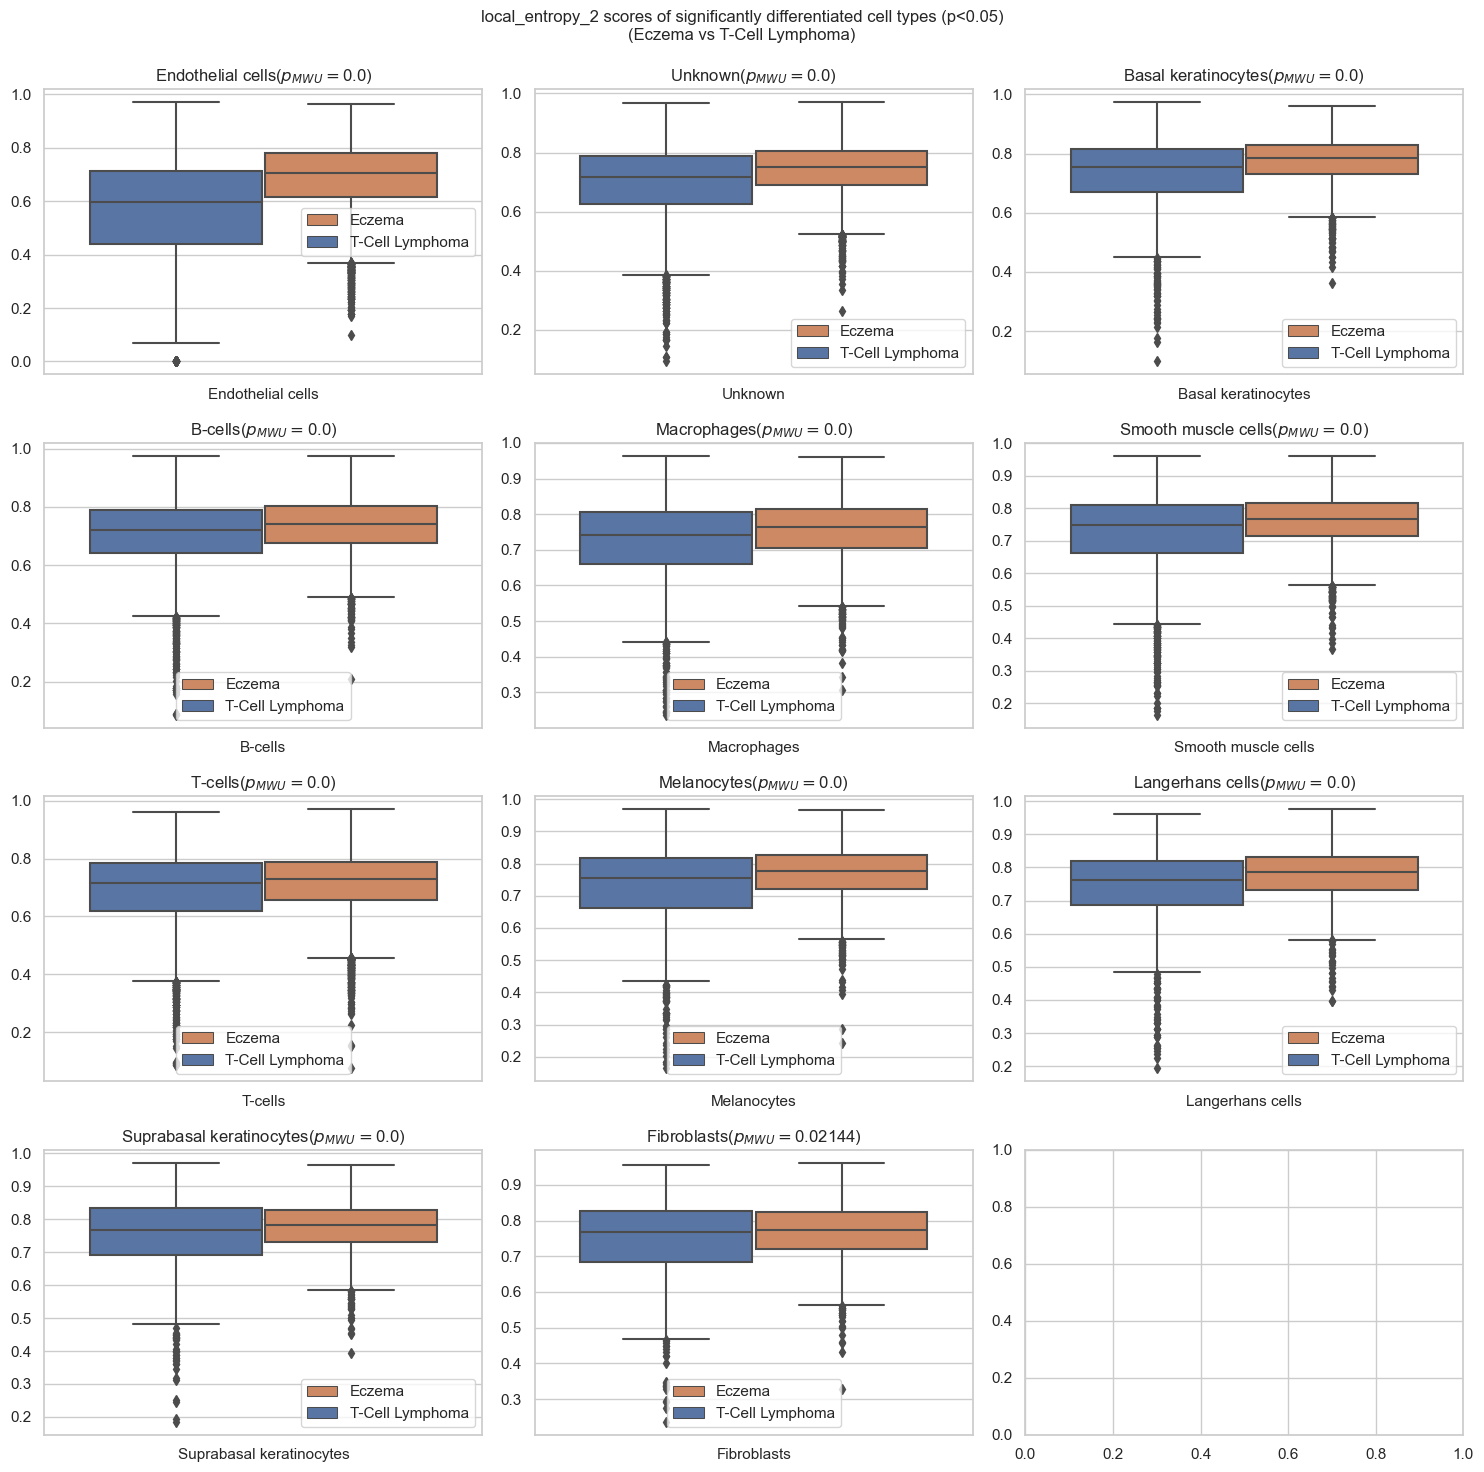

In [49]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('T-Cell Lymphoma', 'Eczema', 'local_entropy_2')

#### b. local_homophily_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0
10 3 1


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


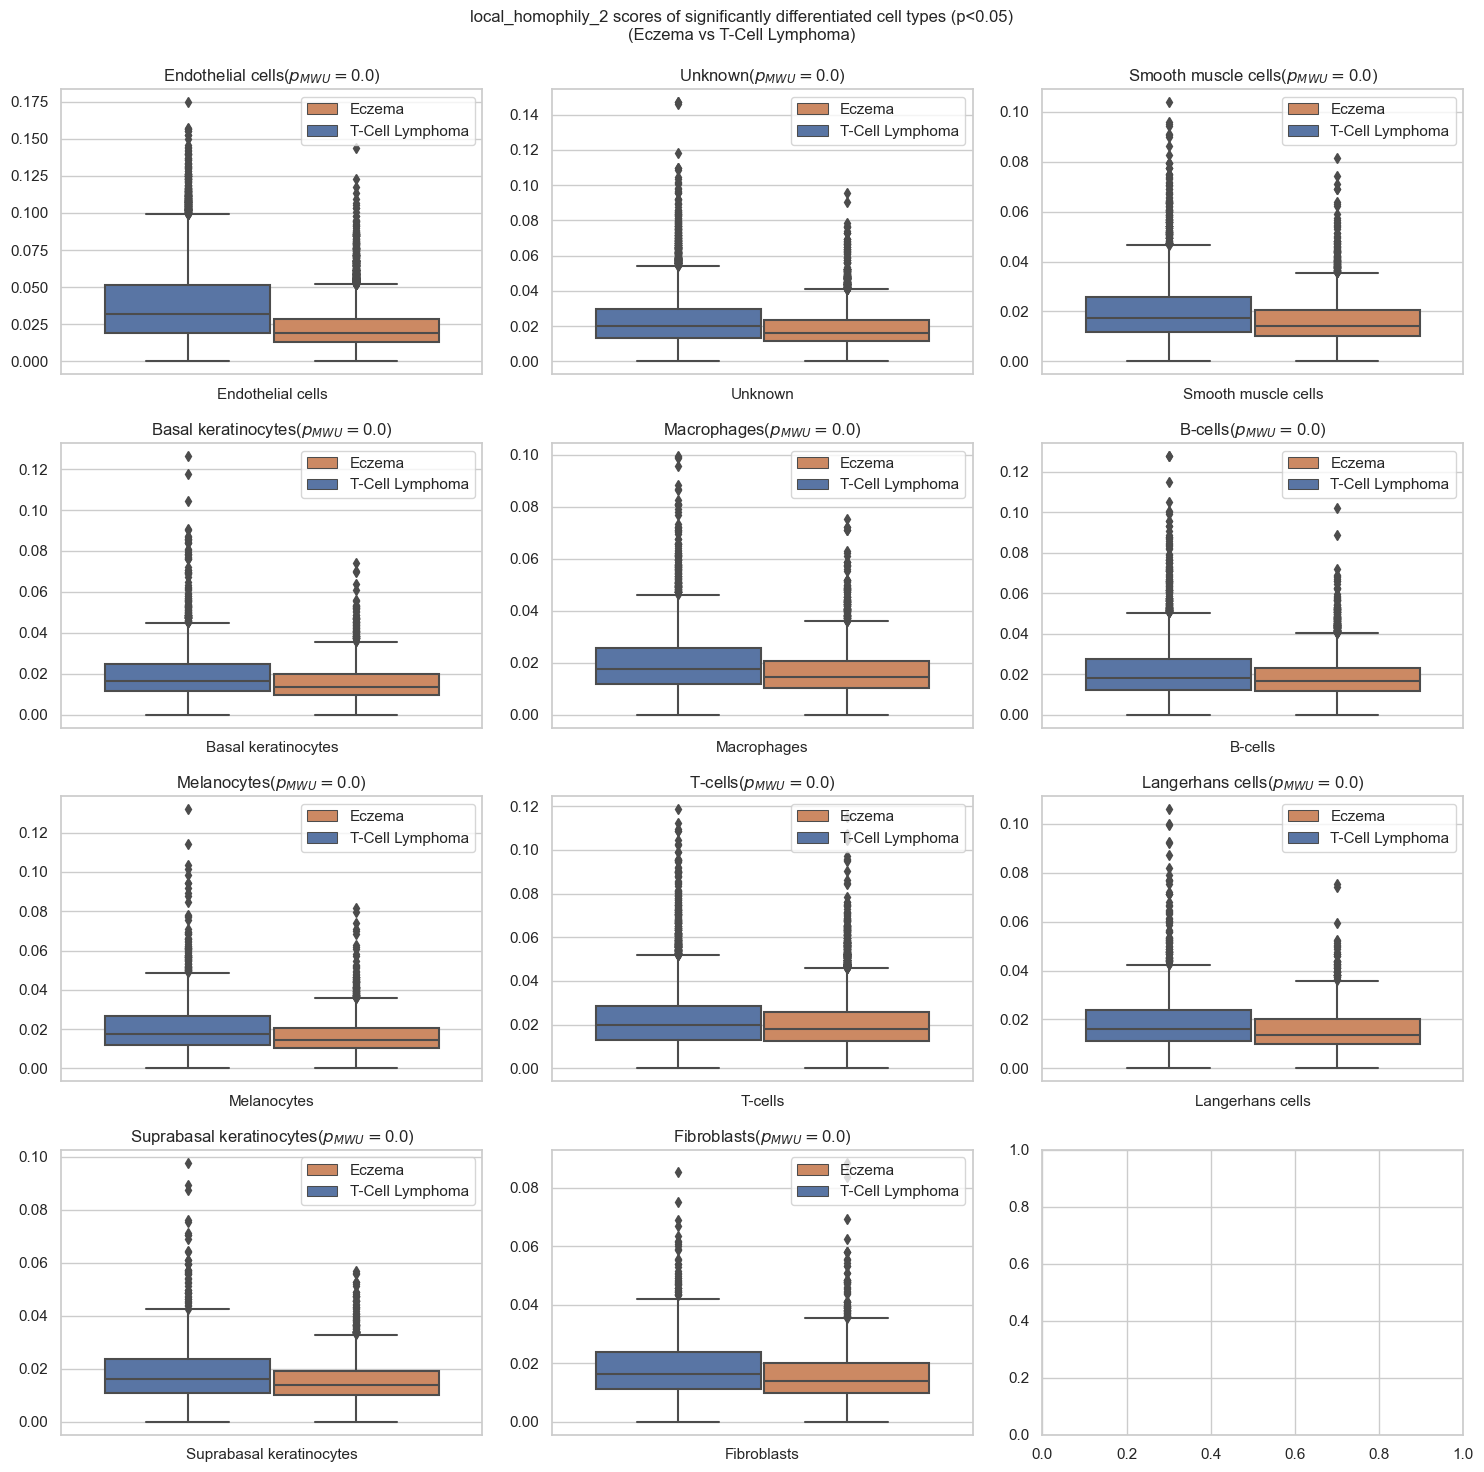

In [50]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('T-Cell Lymphoma', 'Eczema', 'local_homophily_2')

### c. egophily_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


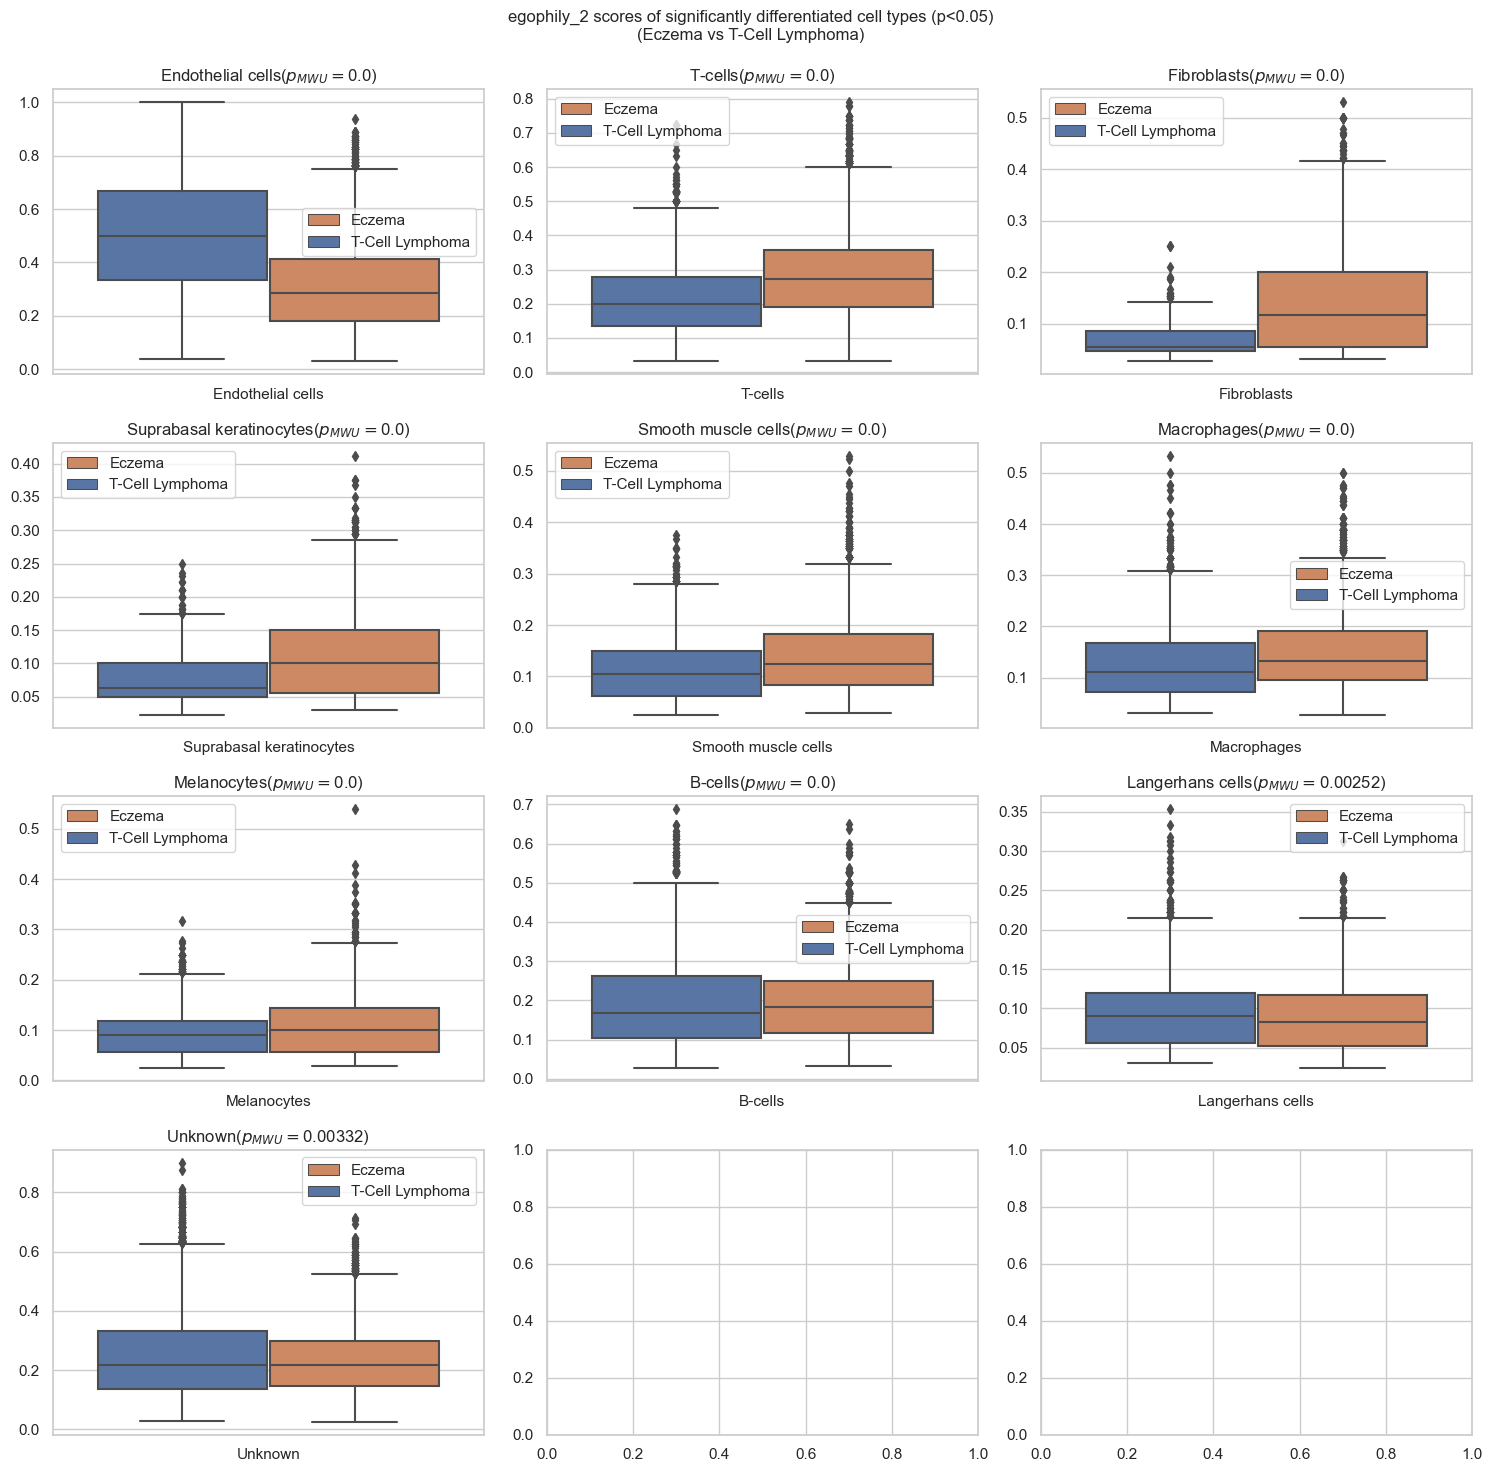

In [51]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('T-Cell Lymphoma', 'Eczema', 'egophily_2')

#### ii. TCL vs Psoriasis:

##### local_entropy_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


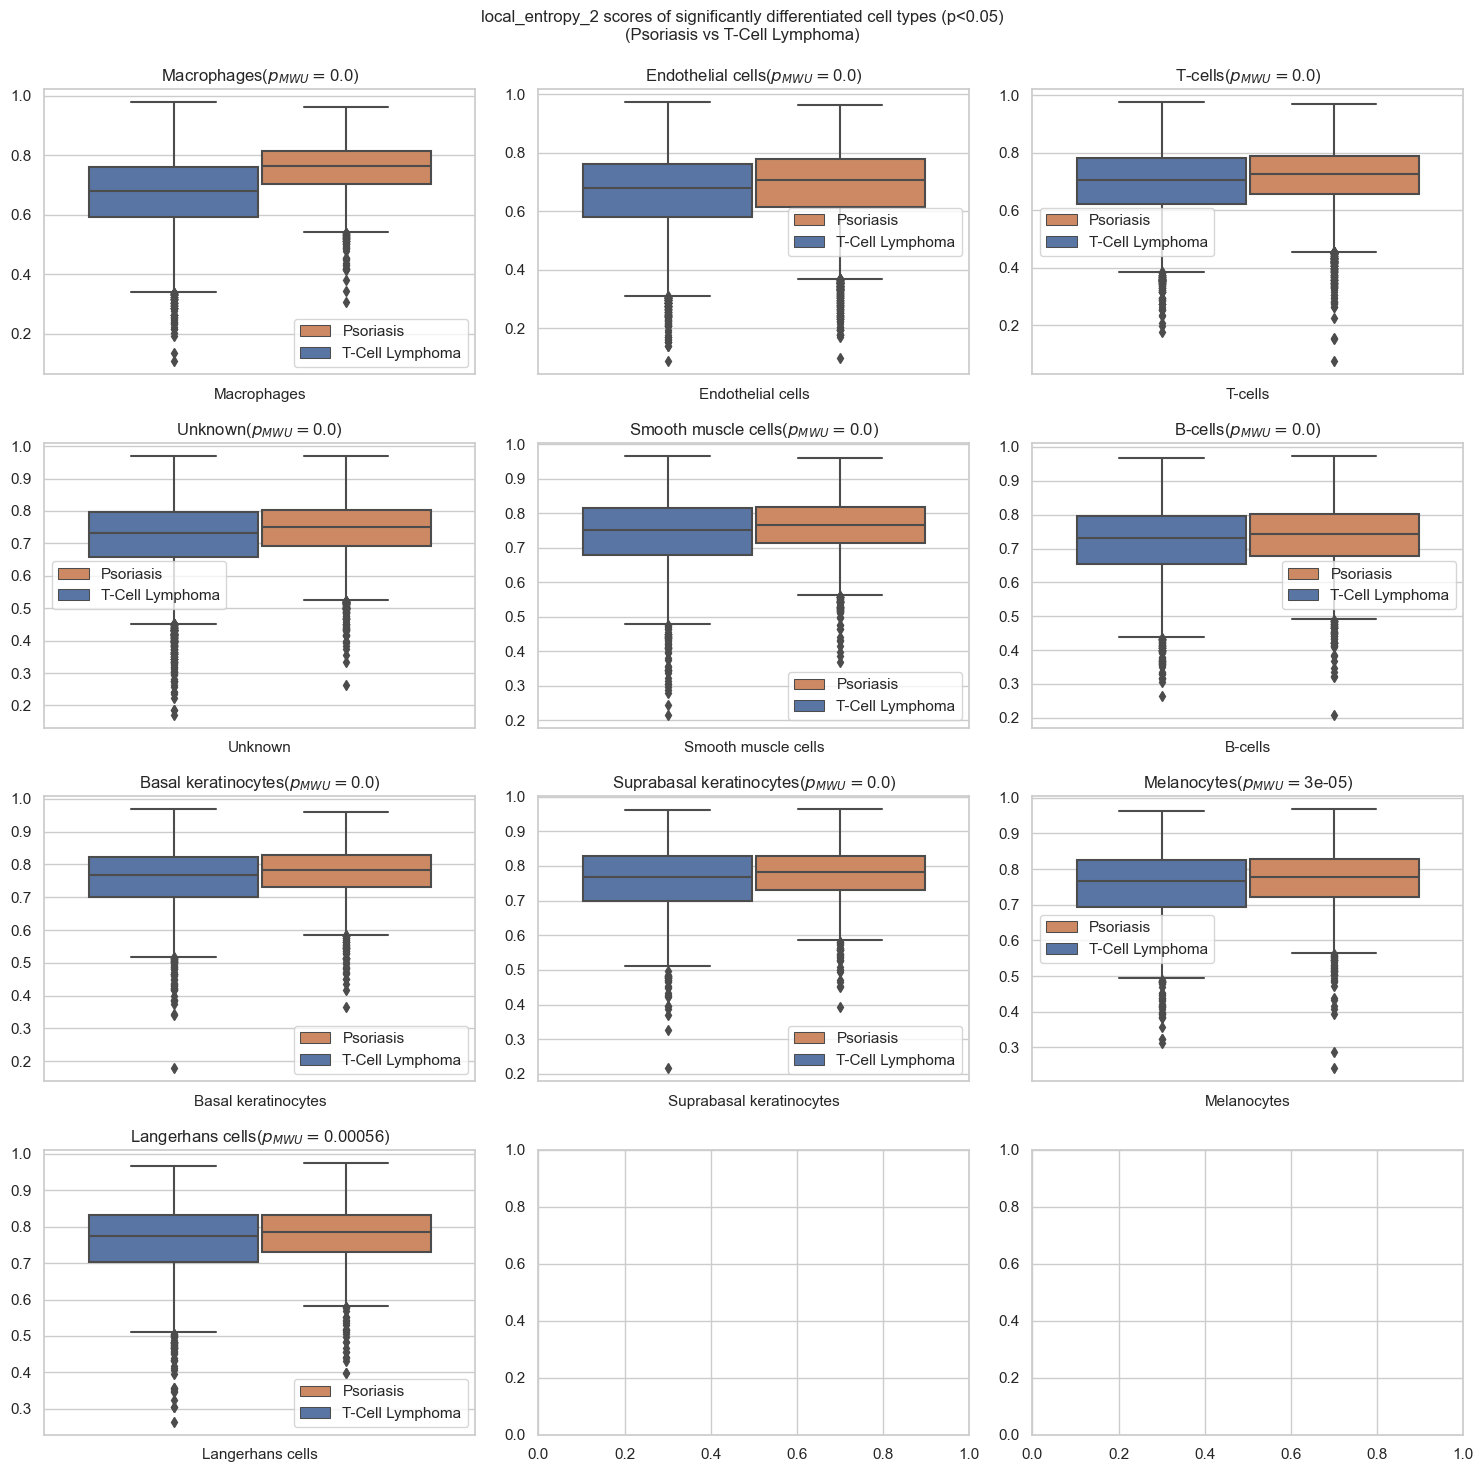

In [52]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('T-Cell Lymphoma', 'Psoriasis', 'local_entropy_2')

##### local_homophily_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0
10 3 1


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


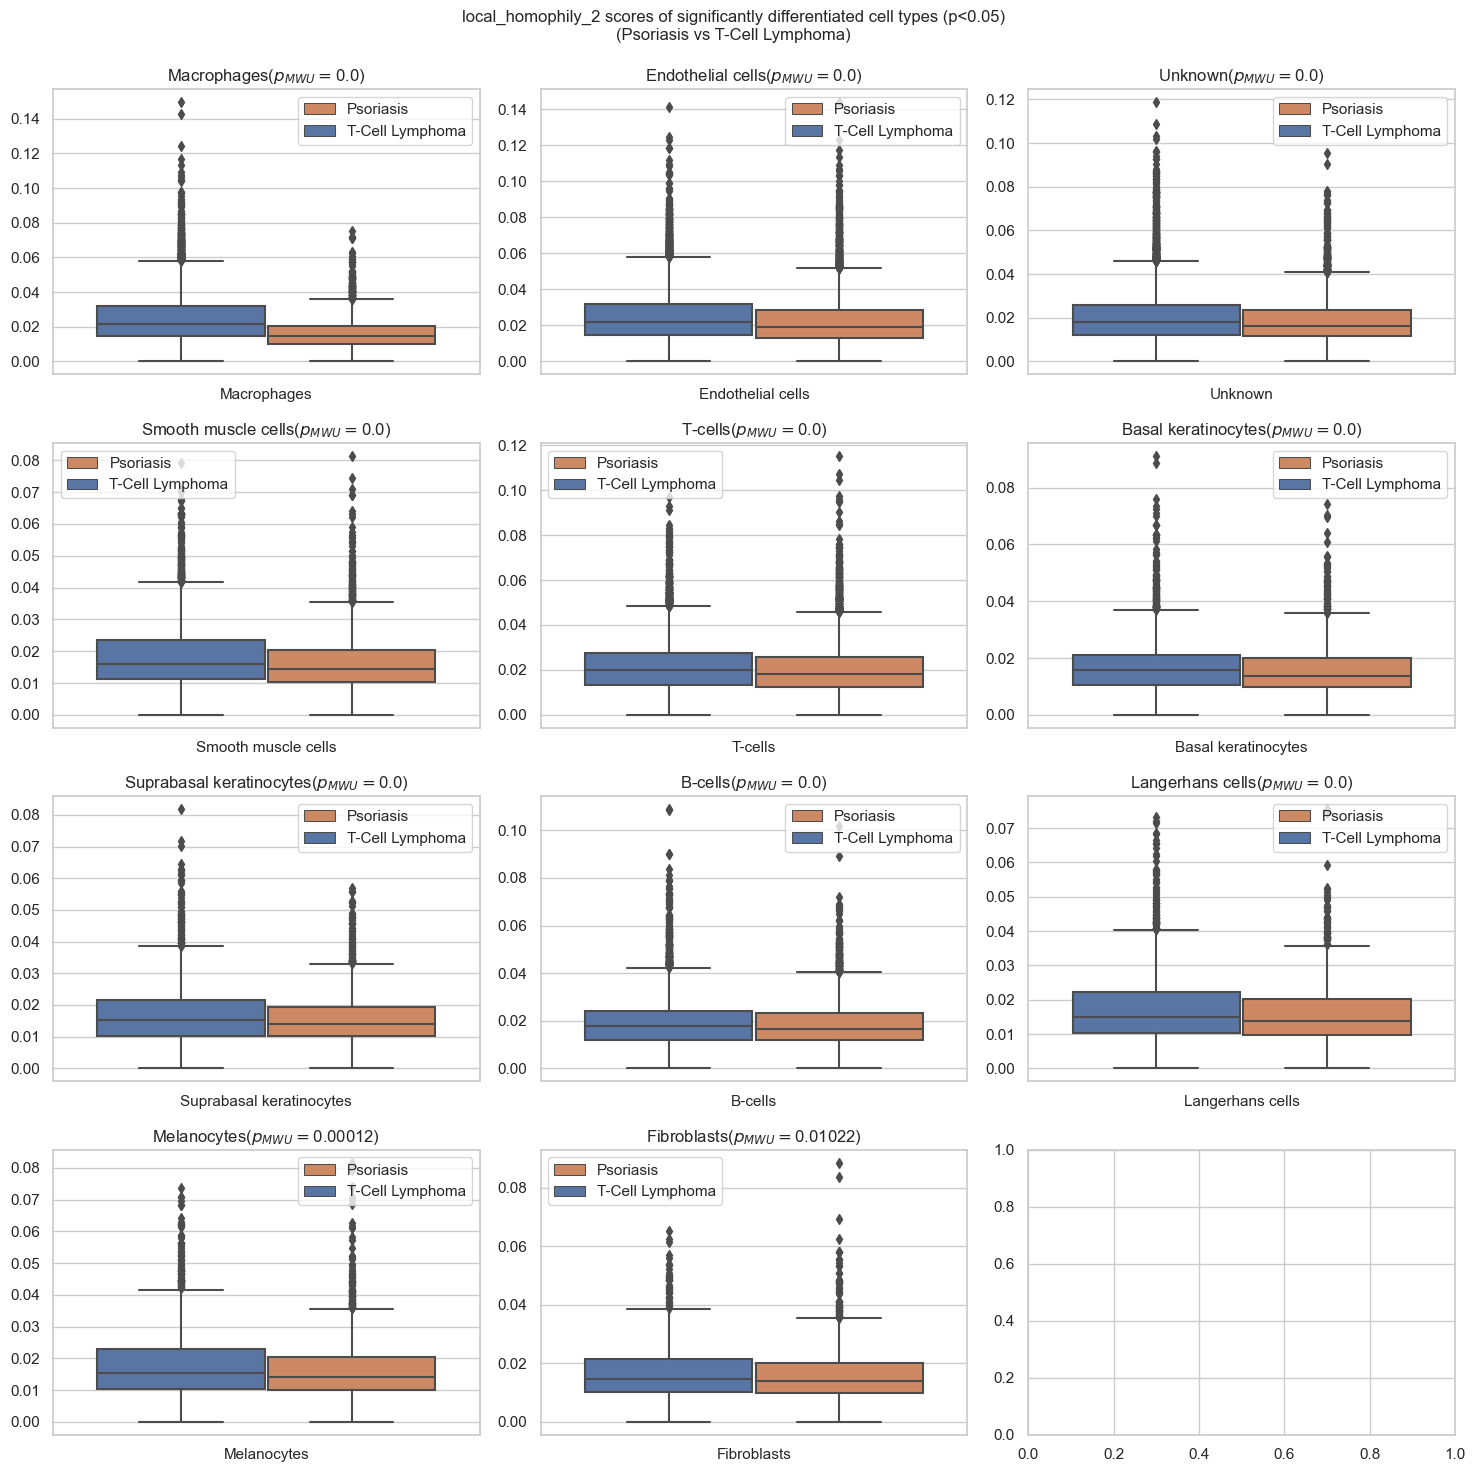

In [53]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('T-Cell Lymphoma', 'Psoriasis', 'local_homophily_2')

##### egophily_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


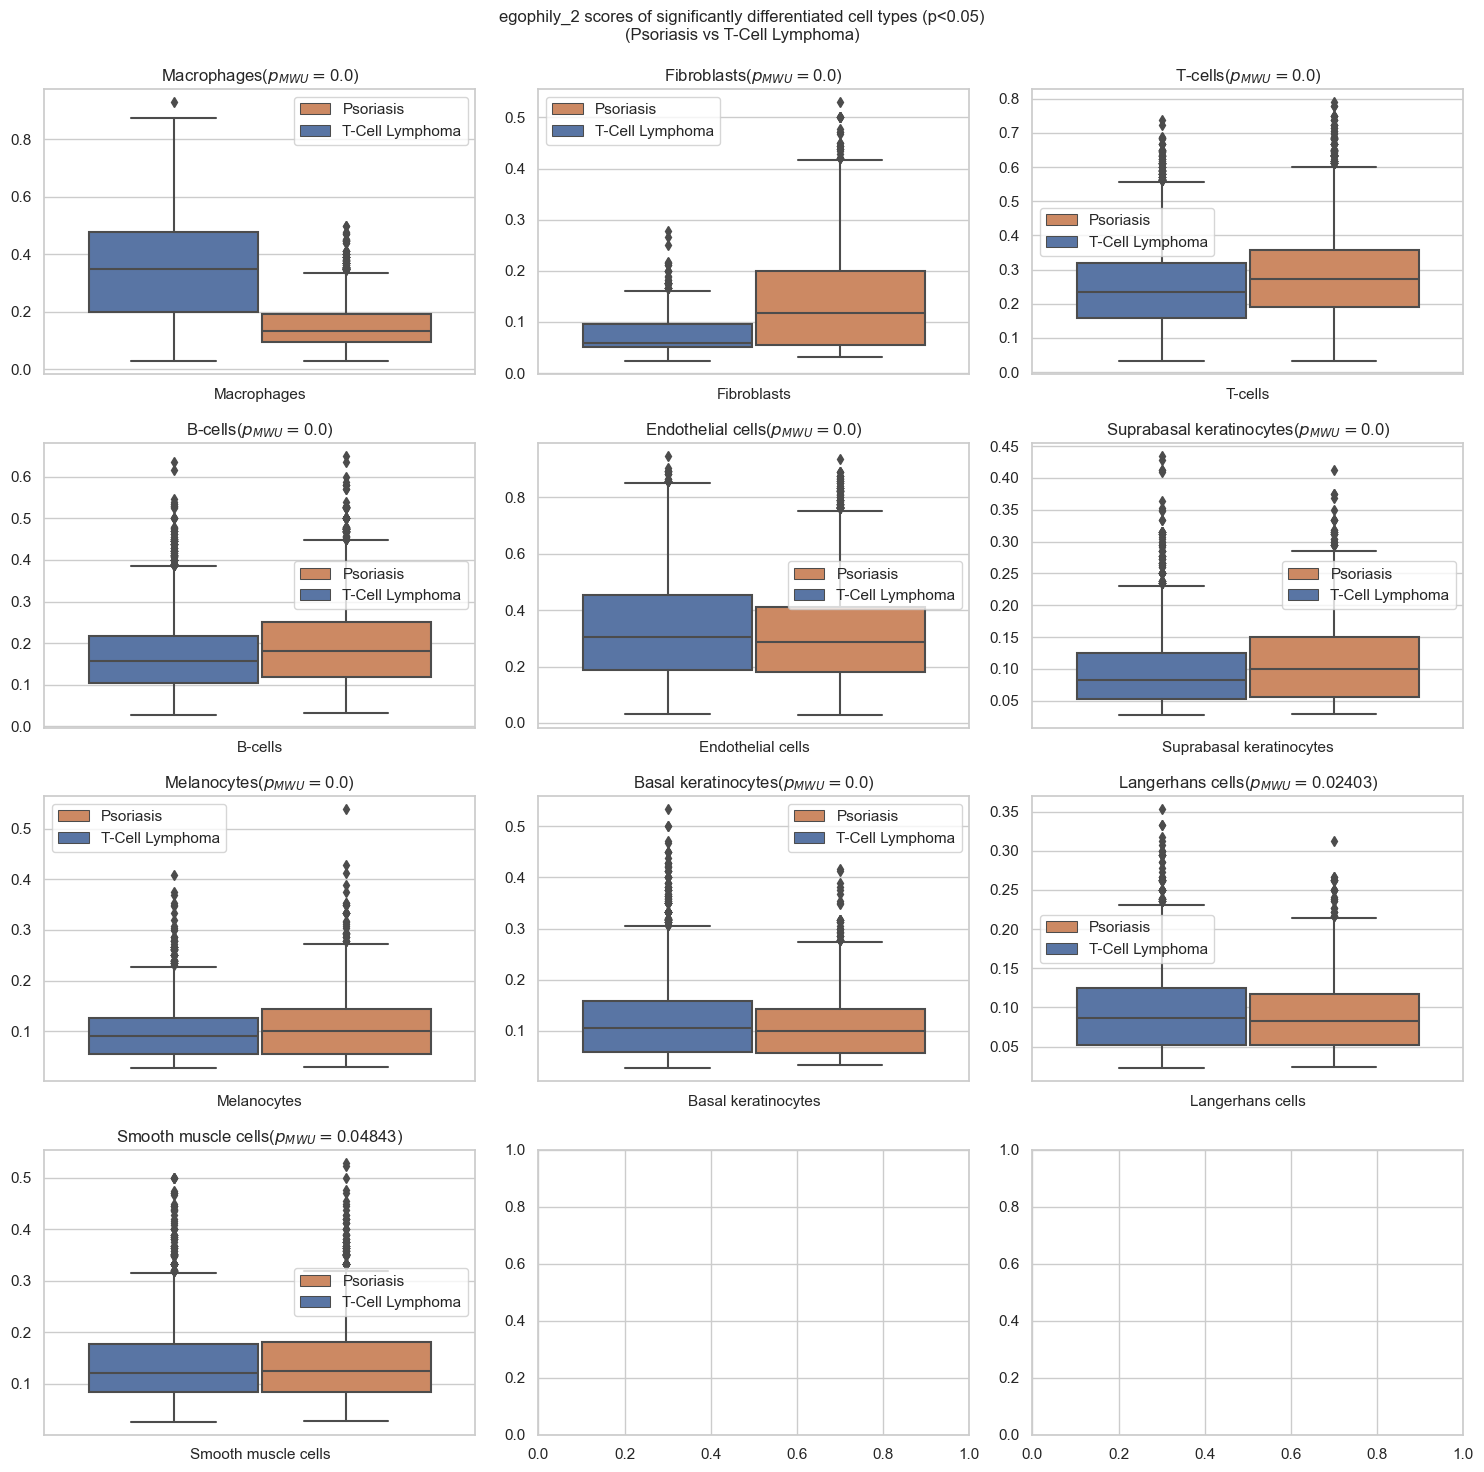

In [54]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('T-Cell Lymphoma', 'Psoriasis', 'egophily_2')

#### iii. Eczema vs Psoriasis:

##### local_entropy_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


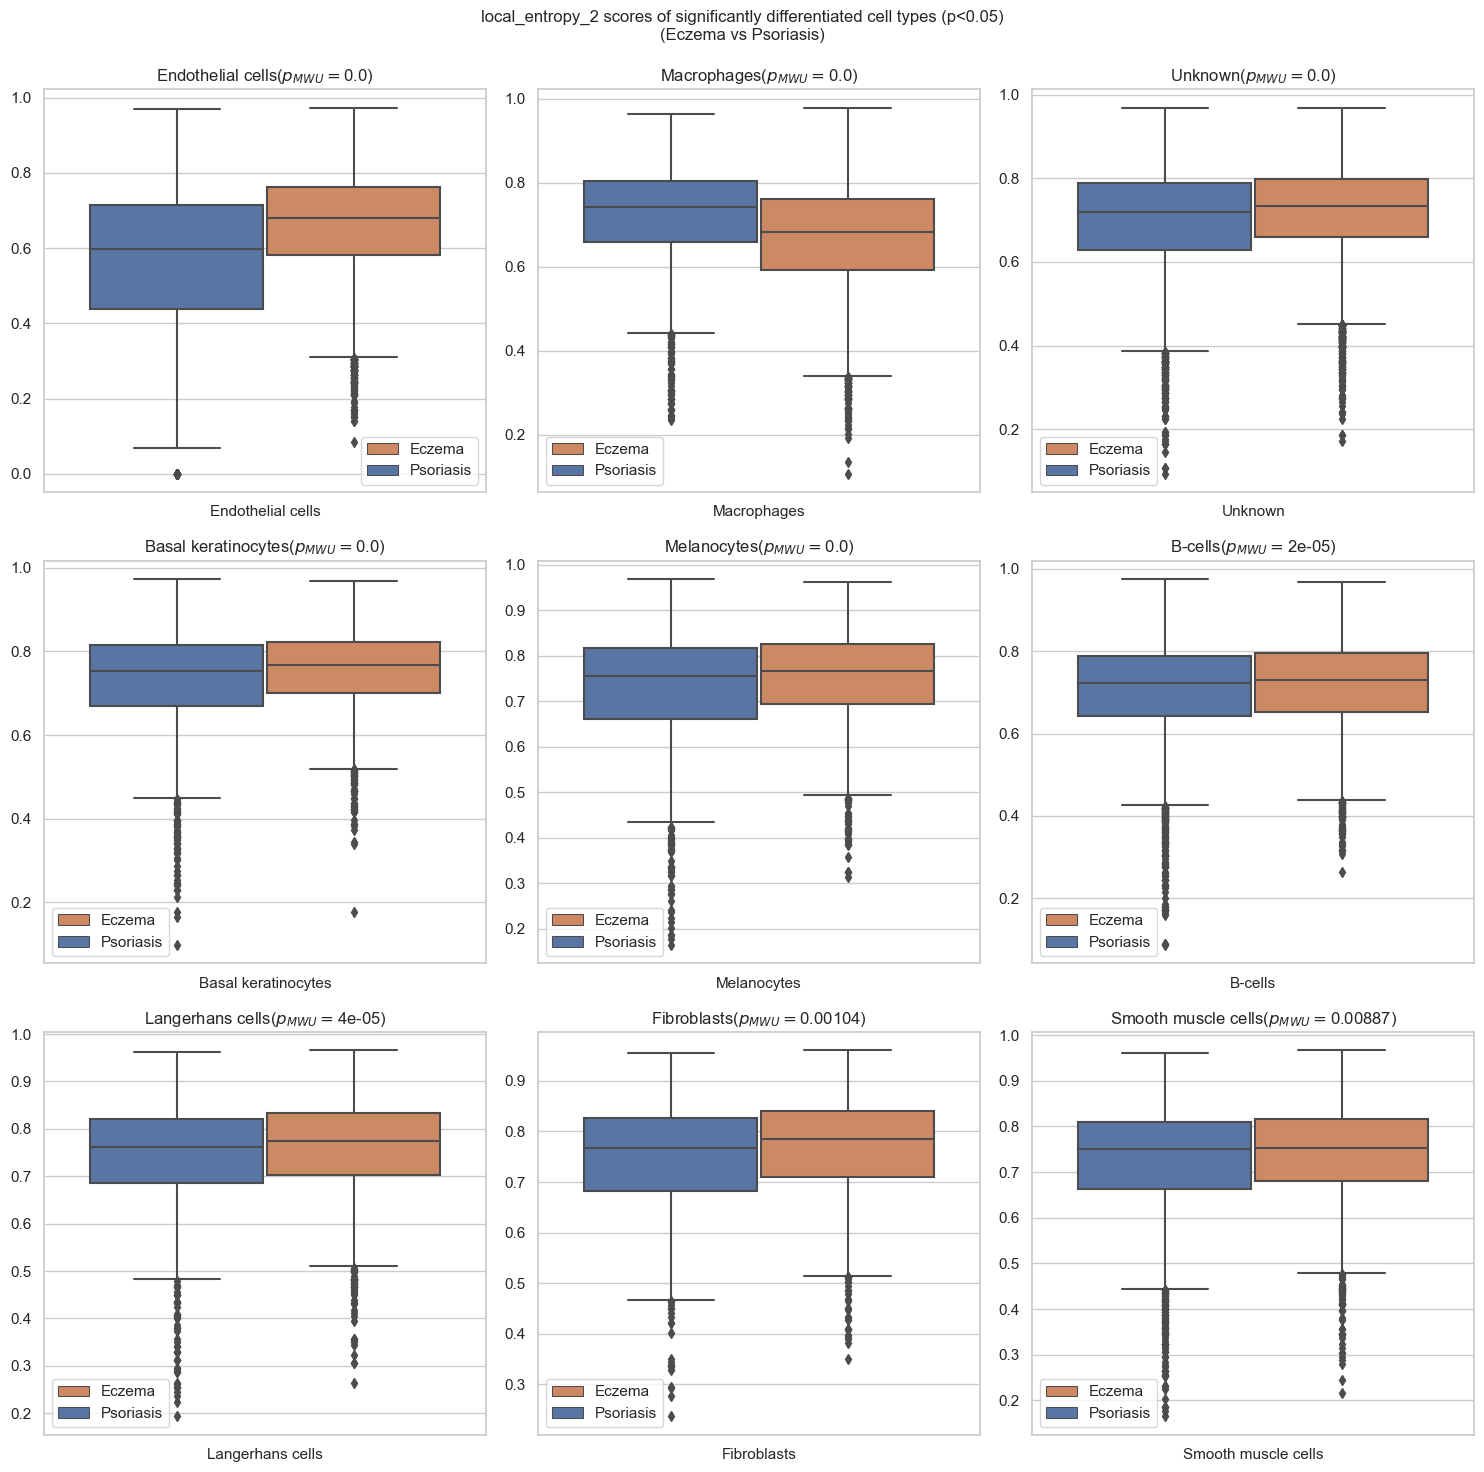

In [55]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('Eczema', 'Psoriasis', 'local_entropy_2')

##### local_homophily_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2
9 3 0


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


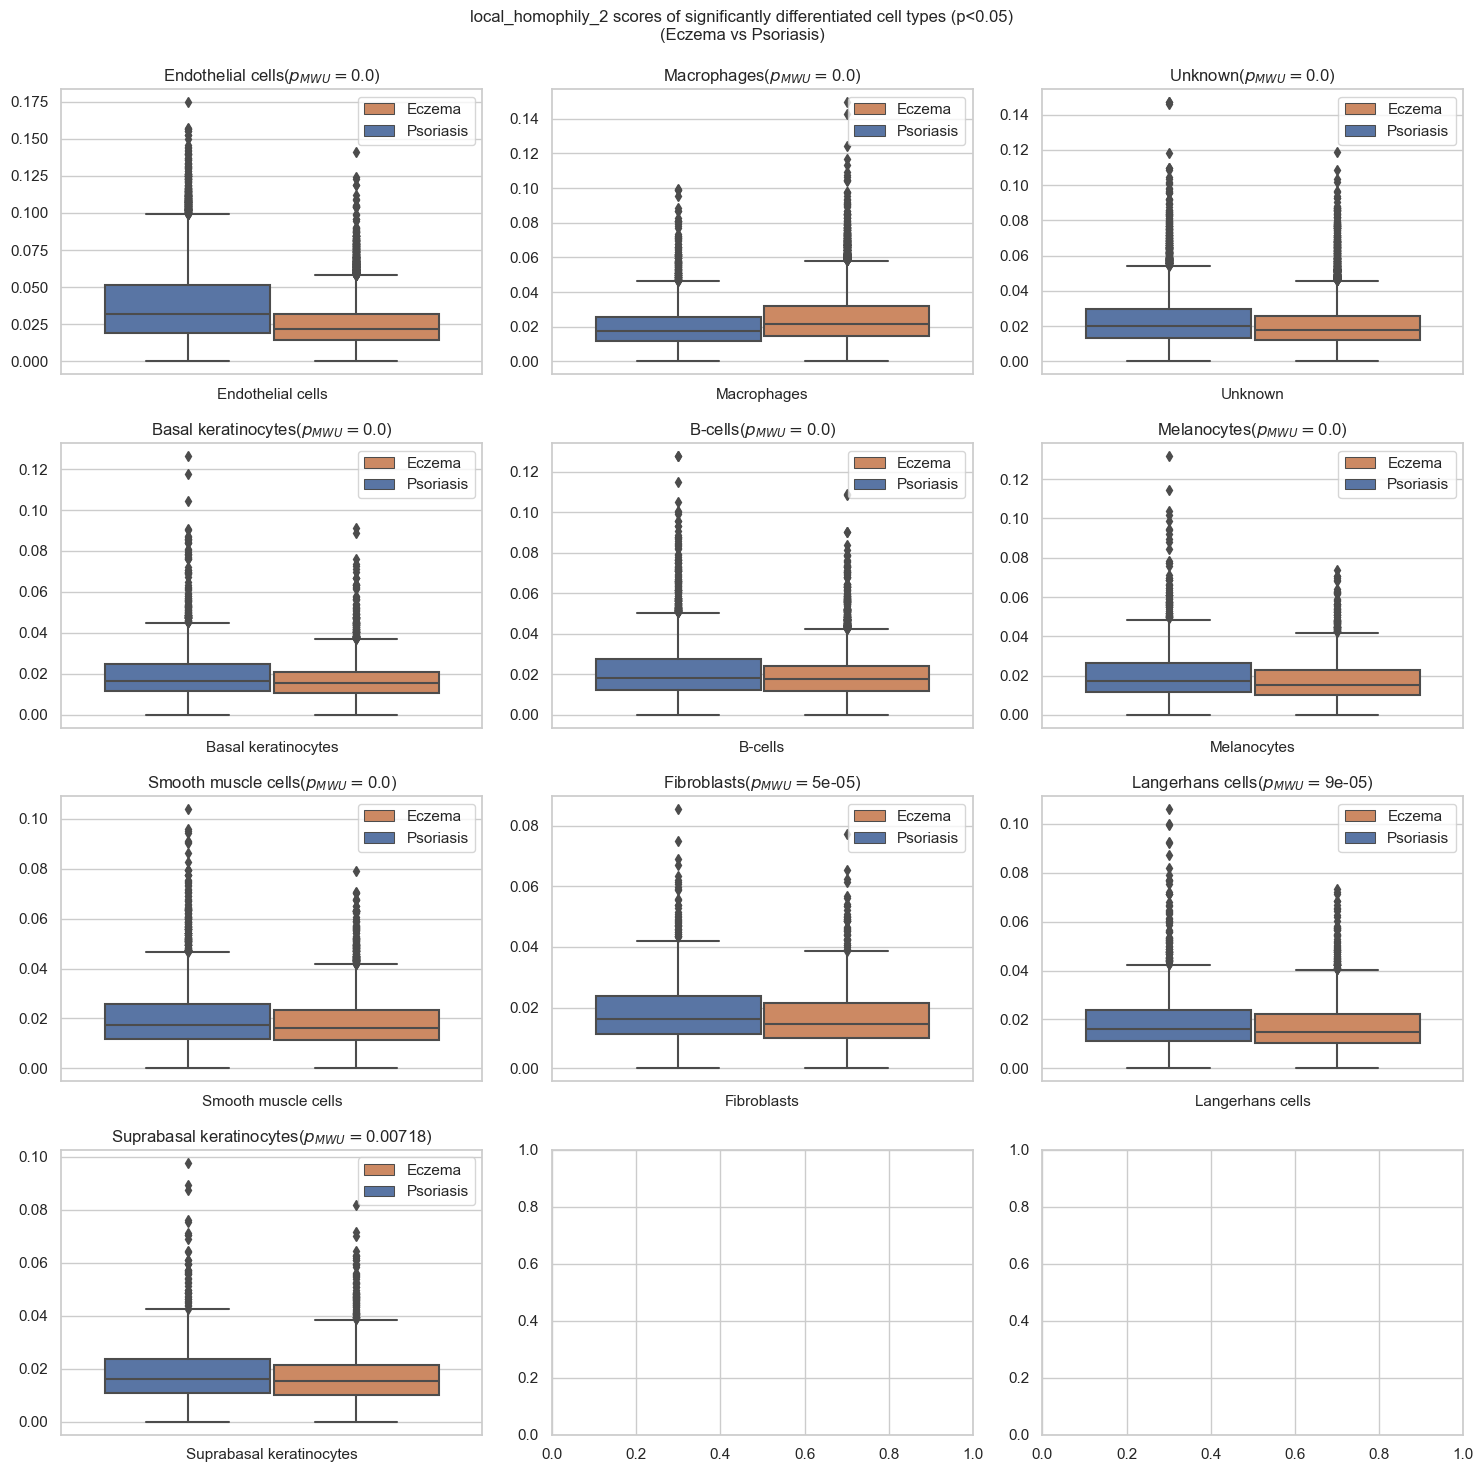

In [56]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('Eczema', 'Psoriasis', 'local_homophily_2')

##### egophily_2:

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2


/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/23338408.py:99: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


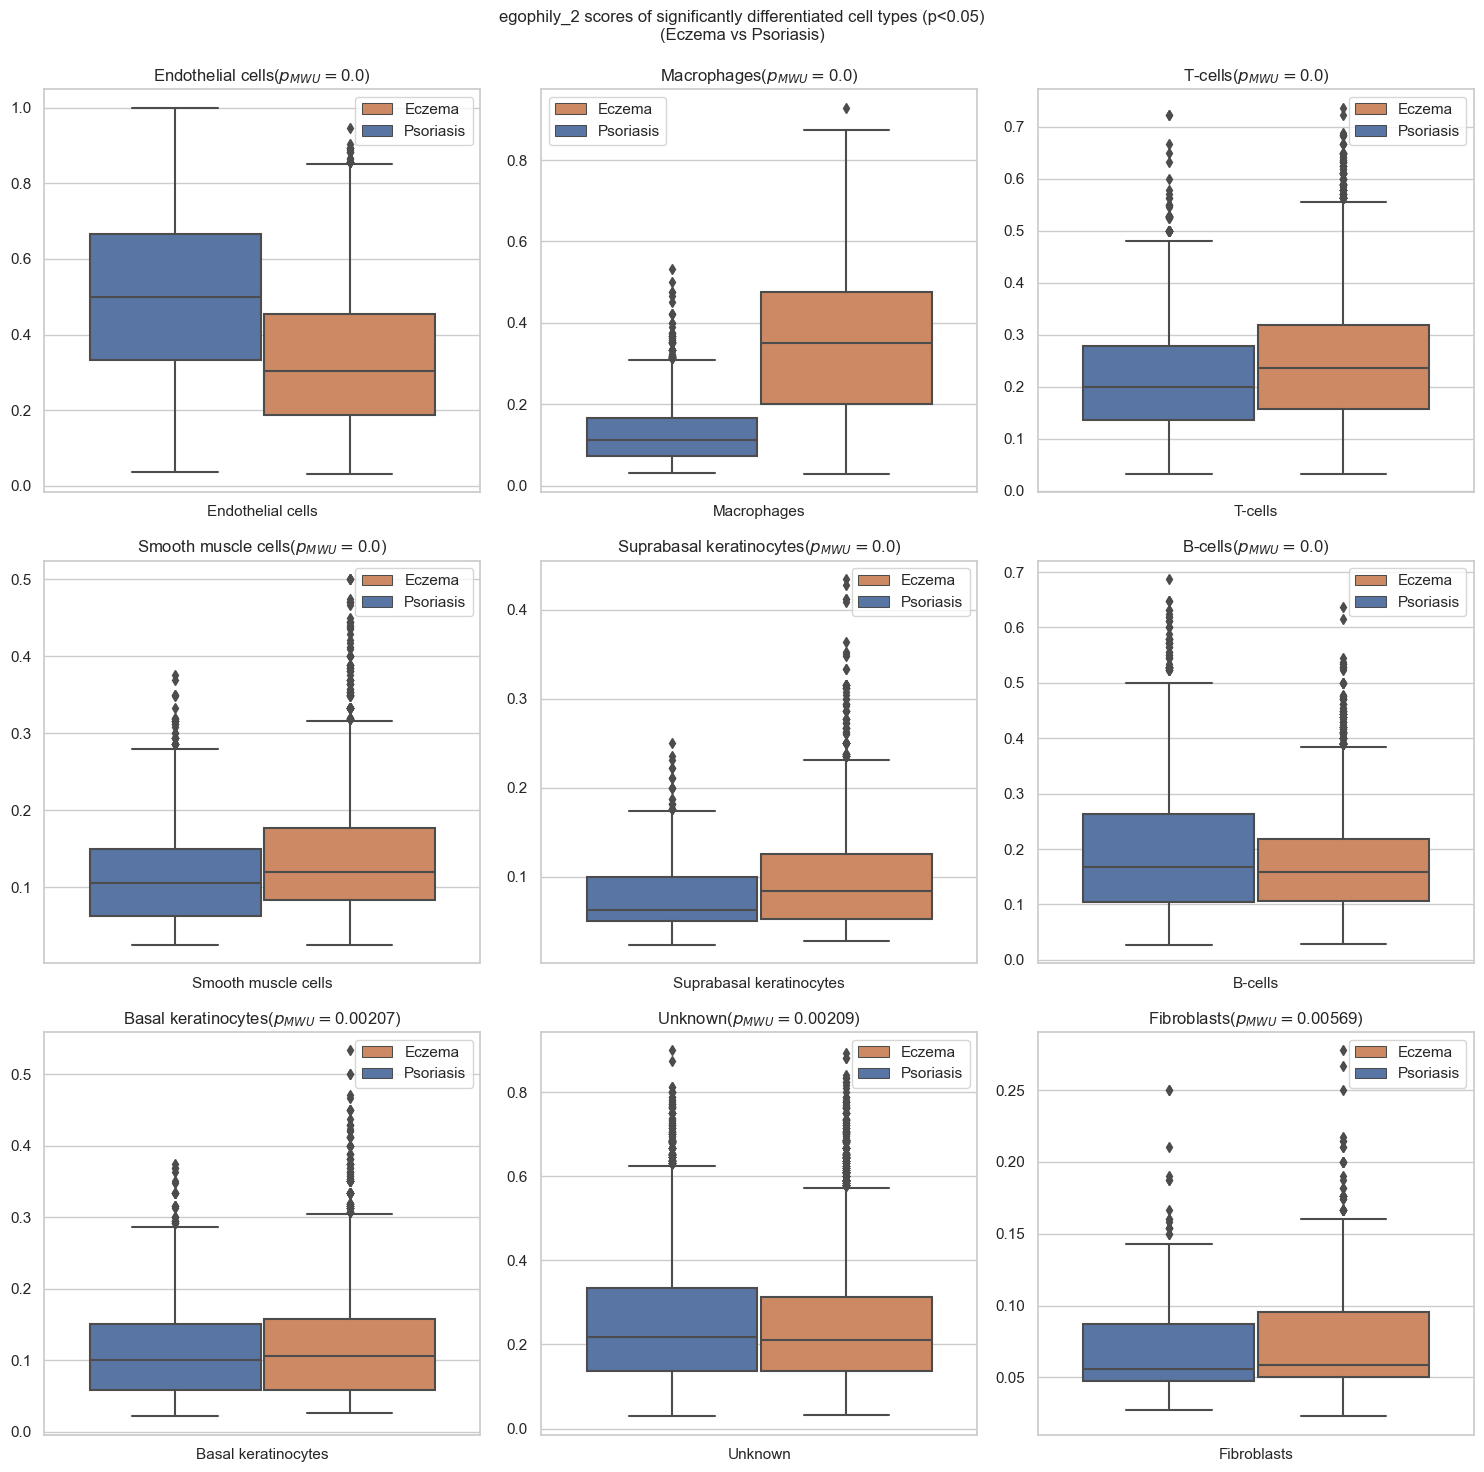

In [57]:
plot_local_heterogeneity_based_differential_analyses_conditionPairWise('Eczema', 'Psoriasis', 'egophily_2')

### B. Local heterogeneity measure-based differential analyses:

#### i. TCL vs Eczema

##### local_entropy_2:

0 0 0
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Eczema vs. Psoriasis: 2.0799297800974776e-05
Psoriasis vs. T-Cell Lymphoma: 3.889188607975583e-13
Eczema vs. T-Cell Lymphoma: 2.623508722190963e-26
1 0 1
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Eczema vs. Psoriasis: 1.3175147718539414e-09
Psoriasis vs. T-Cell Lymphoma: 2.5362049831401964e-12
Eczema vs. T-Cell Lymphoma: 1.6112798220653272e-31
2 0 2
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Eczema vs. Psoriasis: 1e-323
Psoriasis vs. T-Cell Lymphoma: 3.4770736402100554e-35
Eczema vs. T-Cell Lymphom

KeyError: 'local_entropy_2'

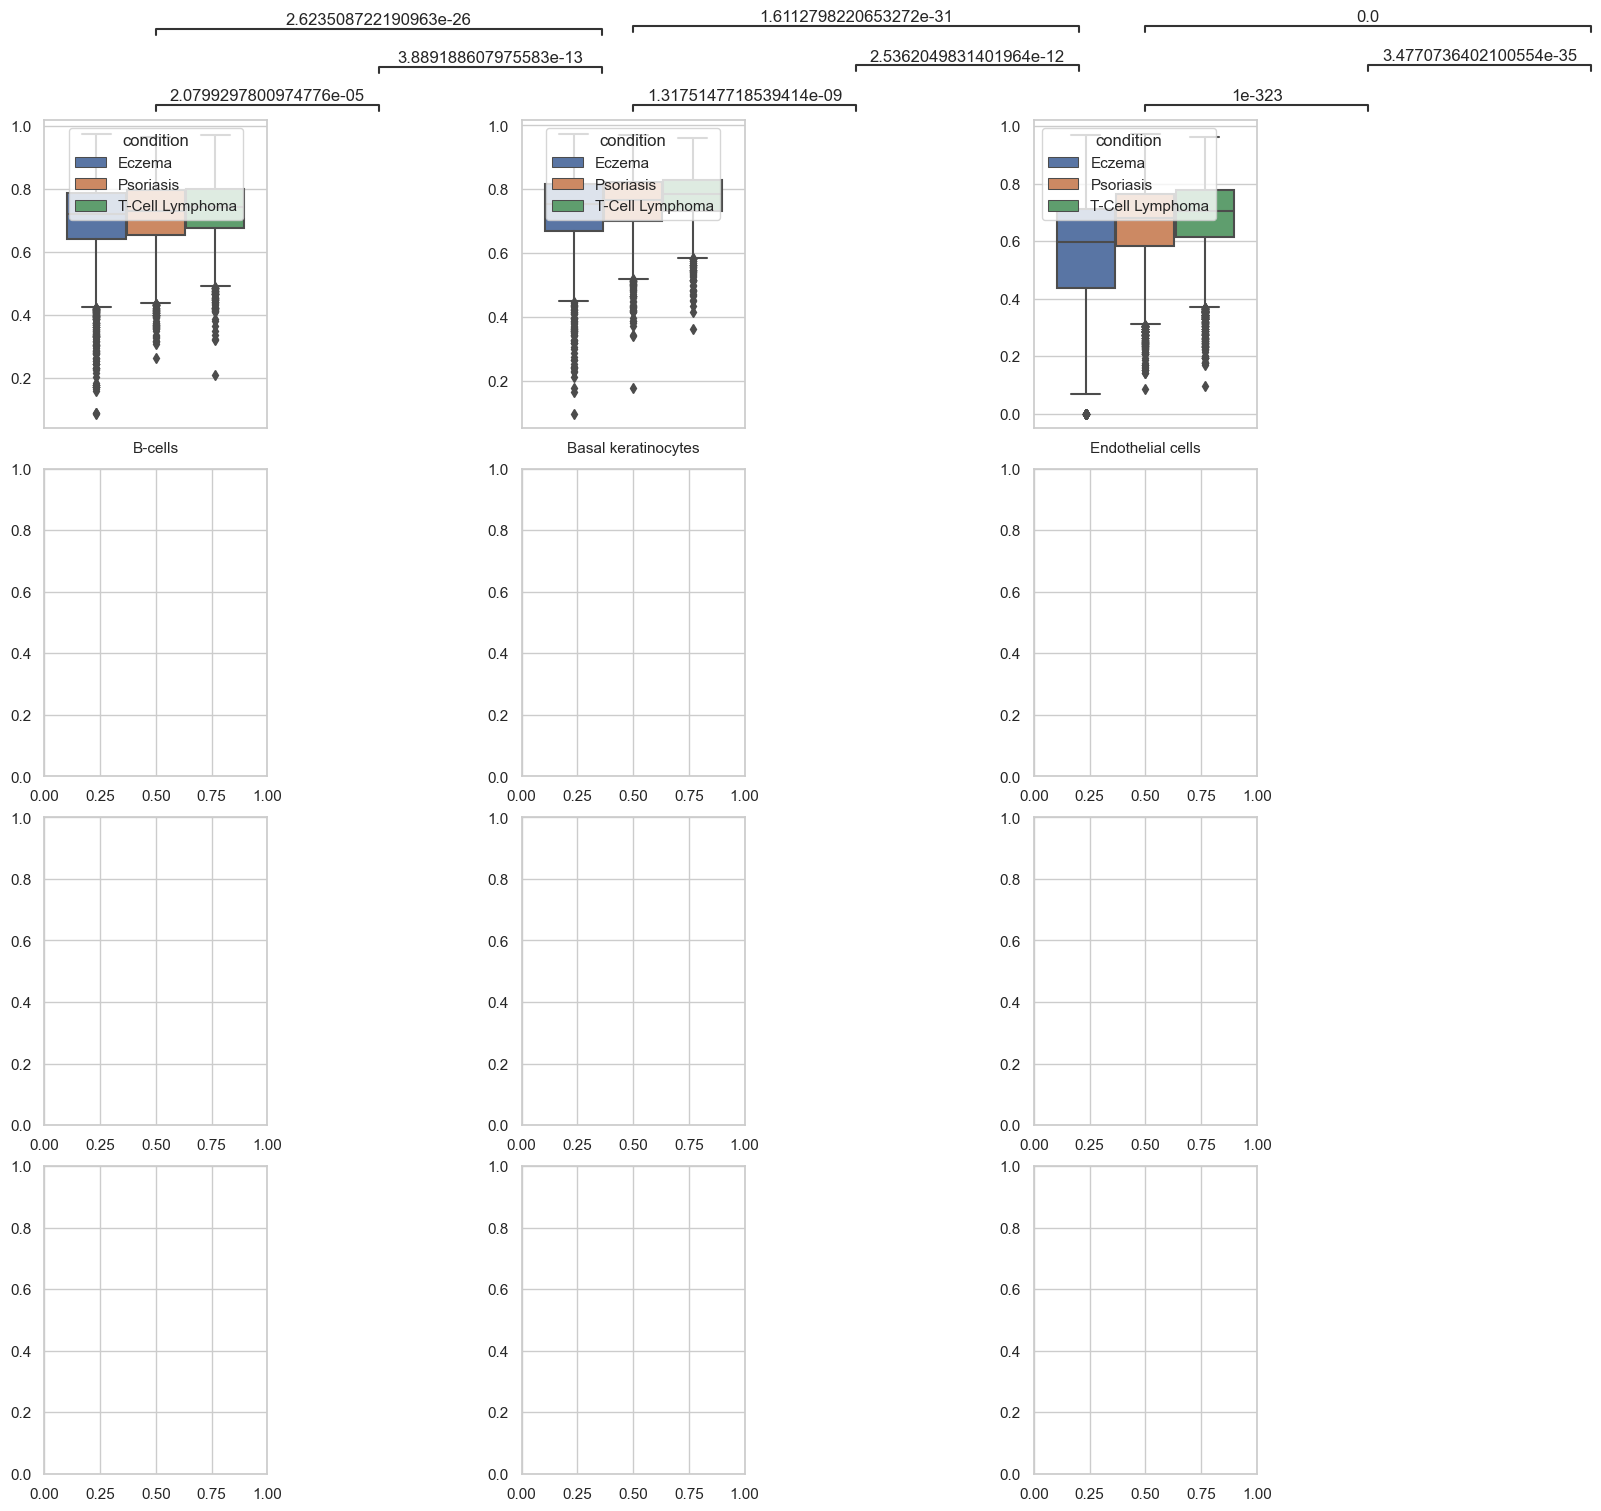

In [102]:
plot_local_heterogeneity_based_differential_analyses_cumulative('local_entropy_2')

In [103]:
mwu_pvals_per_celltype[i][j][heterogeneity_score_under_review]

KeyError: 'T-Cell Lymphoma'

In [105]:
j

'Unknown'

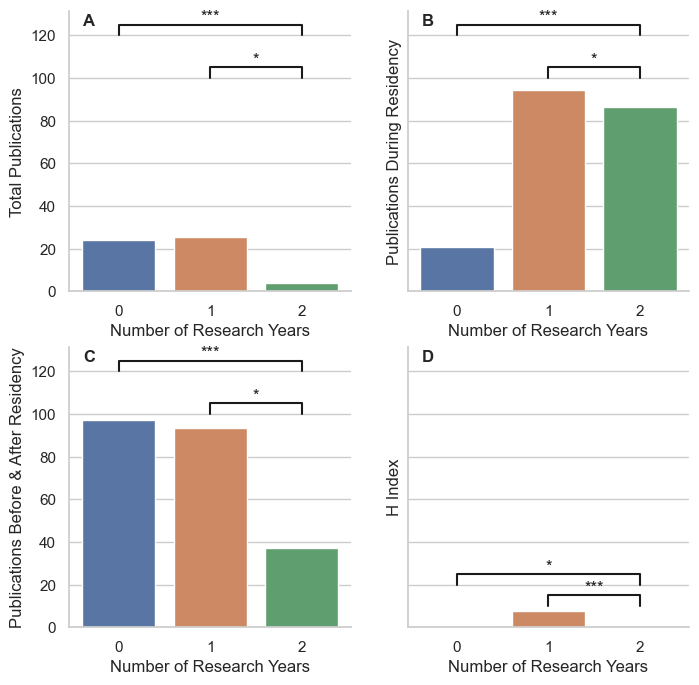

In [106]:
def annot_stat(star, x1, x2, y, h, col='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color=col)
    
zero = pd.DataFrame({'Number of Research Years': [0,1,2], 
                     'Total Publications': 100*np.random.random(size=3),
                     'Publications During Residency': 100*np.random.random(size=3),
                     'Publications Before & After Residency': 100*np.random.random(size=3), 
                     'H Index': 10*np.random.random(size=3)})

fig, axes = plt.subplots(2, 2, sharex= False, sharey= True, figsize=(8,8))

ax1= sns.barplot(ax=axes[0,0], x= zero['Number of Research Years'], y= zero['Total Publications'])
ax2= sns.barplot(ax=axes[0,1], x= zero['Number of Research Years'], y= zero['Publications During Residency'])
ax3= sns.barplot(ax=axes[1,0], x= zero['Number of Research Years'], y= zero['Publications Before & After Residency'])
ax4= sns.barplot(ax=axes[1,1], x= zero['Number of Research Years'], y= zero['H Index'])

ax1.text(0.05, 0.95, "A", fontweight="bold", transform=ax1.transAxes)
ax2.text(0.05, 0.95, "B", fontweight="bold", transform=ax2.transAxes)
ax3.text(0.05, 0.95, "C", fontweight="bold", transform=ax3.transAxes)
ax4.text(0.05, 0.95, "D", fontweight="bold", transform=ax4.transAxes)

annot_stat('*', 1, 2, 100, 5, ax=ax1)
annot_stat('***', 0, 2, 120, 5, ax=ax1)

annot_stat('*', 1, 2, 100, 5, ax=ax2)
annot_stat('***', 0, 2, 120, 5, ax=ax2)

annot_stat('*', 1, 2, 100, 5, ax=ax3)
annot_stat('***', 0, 2, 120, 5, ax=ax3)

annot_stat('***', 1, 2, 10, 5, ax=ax4)
annot_stat('*', 0, 2, 20, 5, ax=ax4)


sns.despine()
plt.show()

# ===========================================================================================

In [3]:
df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]


In [4]:
from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [0.008659557933880048, 6.378941946712554e-05, 0.14778816016231236]


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Custom statistical test, P_val:8.660e-03
Thur vs. Sat: Custom statistical test, P_val:6.379e-05
Fri vs. Sun: Custom statistical test, P_val:1.478e-01


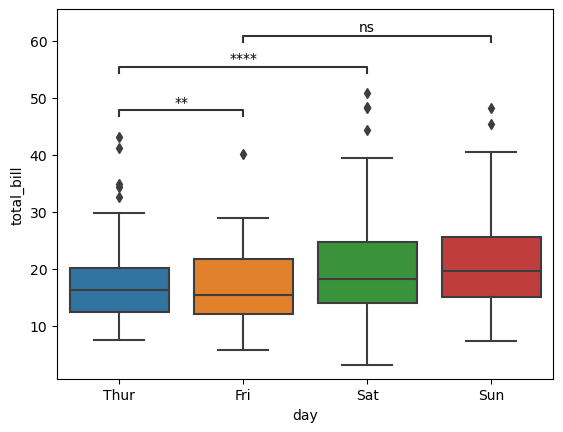

In [19]:
from statannotations.Annotator import Annotator
annot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)
ax = sns.boxplot(data=df, x=x, y=y)
annot.new_plot(ax=ax, pairs=pairs,
               data=df, x=x, y=y)
(annot
 .configure(test=None, test_short_name=test_short_name)
 .set_pvalues(pvalues=pvalues)
 .annotate())
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Custom statistical test, P_val:8.660e-03
Thur vs. Sat: Custom statistical test, P_val:6.379e-05
Sun vs. Fri: Custom statistical test, P_val:1.478e-01


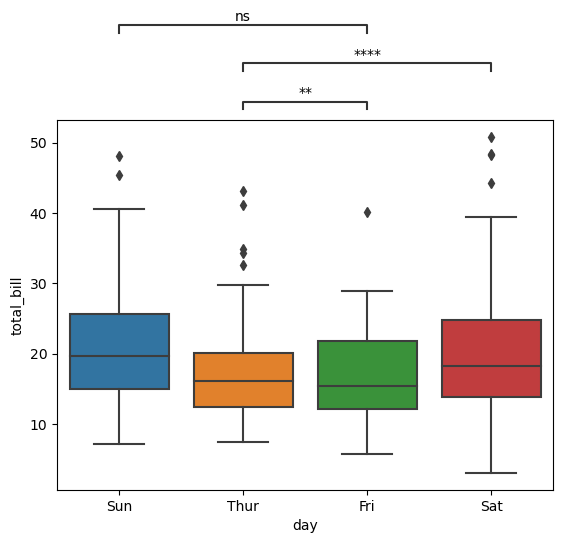

In [20]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']

ax = sns.boxplot(data=df, x=x, y=y, order=order)

pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")]

annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
annotator.configure(test=None, text_format='star', loc='outside')
annotator.set_pvalues(pvalues=pvalues)
# annotator.apply_and_annotate()
annotator.annotate()
plt.show()

Sat_Yes vs. Sat_No: t-test independent samples, P_val:4.304e-01 t=7.922e-01
Thur_No vs. Fri_No: t-test independent samples, P_val:7.425e-01 t=-3.305e-01
Thur_Yes vs. Sun_No: t-test independent samples, P_val:5.623e-01 t=-5.822e-01


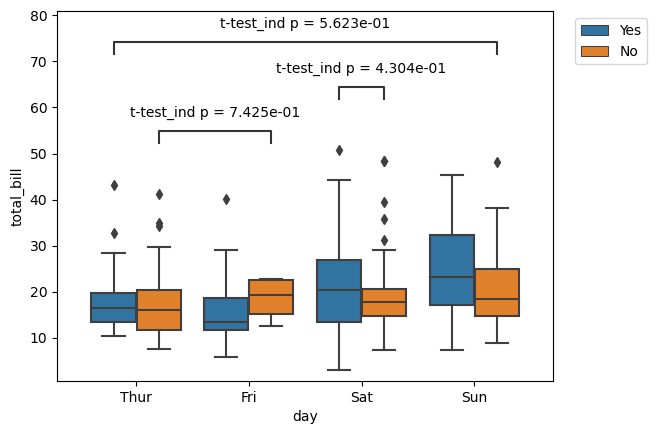

In [31]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
pairs = [(("Thur", "No"), ("Fri", "No")),
         (("Sat", "Yes"), ("Sat", "No")),
         (("Sun", "No"), ("Thur", "Yes"))]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
annot.new_plot(ax, pairs,
               data=df, x=x, y=y, hue=hue)
annot.configure(test='t-test_ind', text_format='full', loc='inside',
                comparisons_correction=None, line_height=0.05, text_offset=8)

annot.apply_test().annotate(line_offset_to_group=0.2, line_offset=0.1)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

In [7]:
import seaborn as sns

from statannotations.Annotator import Annotator

Thur vs. Fri: first pair
Thur vs. Sat: second pair
Sun vs. Fri: third pair


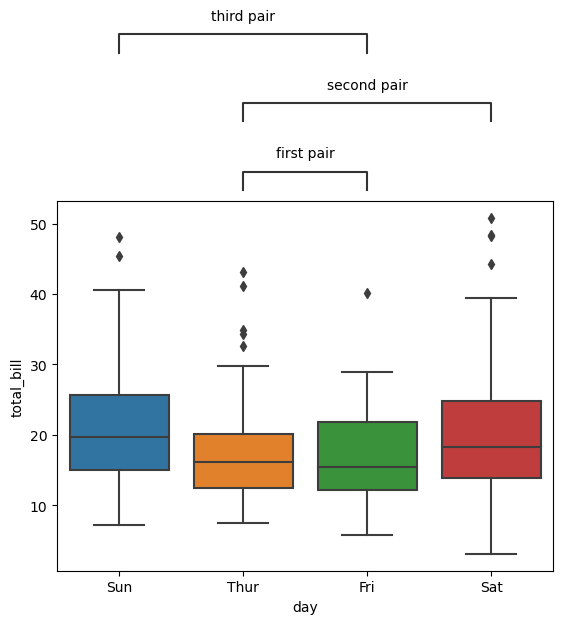

In [32]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot.new_plot(ax, pairs=[("Thur", "Fri"),("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)
annot.configure(loc='outside', comparisons_correction=None,)
annot.set_custom_annotations(["first pair", "second pair", "third pair"])
annot.annotate()

plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')

Custom TB Handler failed, unregistering


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5h/3mdpj4v91flbh9l55myx51bm0000gn/T/ipykernel_31710/2089813984.py", line 19, in <module>
    annotator = Annotator(ax, pairs, **plotting_parameters)
  File "/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/statannotations/Annotator.py", line 108, in __init__
  File "/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/statannotations/Annotator.py", line 784, in _get_plotter
  File "/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/statannotations/_Plotter.py", line 82, in __init__
  File "/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/statannotations/_Plotter.py", line 28, in __ini

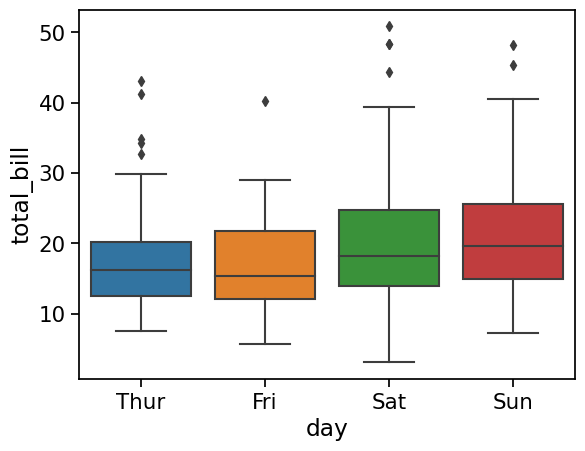

In [24]:
plotting_parameters = {
    'data':    df,
    'x':       x,
    'y':       y
}

pairs = [('Robots', 'Flight'),
         ('Flight', 'Sound'),
         ('Robots', 'Sound')]

with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    # ax = get_log_ax()

    # Plot with seaborn
    sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    label_plot_for_subcats(ax)
    plt.show()

Sat_Yes vs. Sat_No: t-test independent samples, P_val:4.304e-01 t=7.922e-01
Thur_No vs. Fri_No: t-test independent samples, P_val:7.425e-01 t=-3.305e-01
Thur_Yes vs. Sun_No: t-test independent samples, P_val:5.623e-01 t=-5.822e-01


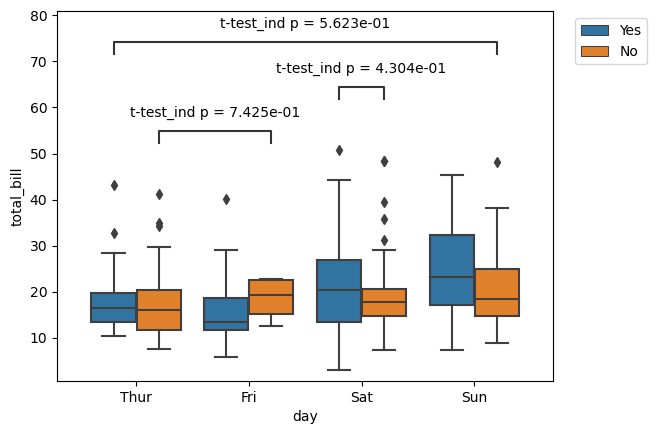

In [30]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
pairs = [(("Thur", "No"), ("Fri", "No")),
         (("Sat", "Yes"), ("Sat", "No")),
         (("Sun", "No"), ("Thur", "Yes"))]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
annot.new_plot(ax, pairs,
               data=df, x=x, y=y, hue=hue)
annot.configure(test='t-test_ind', text_format='full', loc='inside',
                comparisons_correction=None, line_height=0.05, text_offset=8)

annot.apply_test().annotate(line_offset_to_group=0.2, line_offset=0.1)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')